# Final Exam project — Probability and Statistics  

**Course:** Probability and Statistics   
**Program:** Applied Artificial Intelligence (AAI)  
**University:** Singidunum University, Belgrade  
**Student:** Ivan Petrović, 2024230180  
**Date:** 15.01.2026.   
**Dataset:** Wine Quality (Red)

## Instructions for the Final Project

1.

Each student should find, according to the individual interests, a dataset on which she/he will apply adequate methods of statistical reasoning, learnt during the course (all the students should choose different datasets). Datasets can be found e.g. using the new google dataset search engine: https://toolbox.google.com/datasetsearch, or directly from the popular websites e.g.: https://www.kaggle.com/, https://archive.ics.uci.edu/ml/datasets.html, https://datahack.analyticsvidhya.com/contest/all/ ... The chosen dataset should have at least 3 dependent variables (columns in Pandas DataFrame structure).

2.

Based on the inital analysis of data, the students should make an assesment of which statistical characteristics of the data would be the most interesting and useful to obtain. Based on that, each student should choose at least 5 of the following statistical methods (covered during the course) to extract the wanted information:

- **Application of regression analysis (linear, multiple, as well as nonlinear (e.g polynomial)) is mandatory!**

- The rest (as least 4) methods should be chosen from the following list (other methods, not covered during the course (e.g. more advanced machine learning methods), are also acceptable):
- Estimation of the unconditional and conditional probabilities,
- Estimation of the parameters of distributions of single variables (mathematical expectation, variance, standard deviation, median, quartiles, quantiles,...),
- Estimation of the parameters of the joint distributions (covariance, correlation coefficient),
- Estimation of PDF based on histogram, and nonparametric hypothesis testing of distributions using Kolmogorov-Smirnov and/or chi-squared test,
- Estimation of confidence intervals of certain parameters,
- Parametric hypothesis testing.
  
3.

Results of the project should be contained in one Jupyter Notebook (.ipynb) file, and will be orally defended (5-10 min)

# I 

# Setup, Task Definition and Evaluation Criteria

### Reproducibility
- Define task, metrics, and success criteria
- Log library versions and fix random seeds
- Print environment snapshot

### Task
Apply statistical reasoning. 
Predict wine quality (sensory, ordinal score from 1 to 10) from 11 numerical features.
Understand which features affect quality

### Dataset
Wine Quality (Red Wine) dataset  
Cortez et al. (2009), UCI Machine Learning Repository  
https://doi.org/10.24432/C56S3T

### Dataset features baselines explanation (confirmed by acclaimed wine-maker Dušan Šaponja)
- fixed acidity: the amount of non volatile (non gaseous) acids. Avg. 6 - 9 g/L.
- volatile acidity: the amount of acetic acid (giving vinegar taste). Avg. 0.4 - 0.8 g/L (600 ppm). Above 1.4 g/L is fault.
- citric acid: the amount of citric acid. small value is good. Avg. 0.1 - 0.5 g/L.
- residual sugar: the amount of sugar remaining after fermentation stops. Avg. 0.3 - 2 g/L. A wine is dry if < 4 g/L.
- chlorides: the amount of salt. Avg.0.02 - 0.06 g/L.
- free sulfur dioxide: the amount of free SO2. Germicide and antioxidant. Avg. 10-25 ppm. Over 50 ppm is fault.
- total sulfur dioxide: the amount of free and bound forms of SO2. Avg. 50 - 75 ppm, Quality producers keeping it < 60 ppm.
- sulphates: Avg. 0.5 – 0.75 g/L in well-made dry red wines. Max allowed 0.15 g/L.
- density: Typical dry wines ranging from about 0.990 to 0.996 kg/L. Influenced by Alcohol and Sugar.
- pH: scale from 0 (very acidic) to 14 (very basic). Most dry red wines Avg. 3.3 - 3.6. on PH scale
- alcohol: Typical quality dry red wine alcohol content: 11.5%-15%. Less quality vines have less alcohol.
- quality: output variable (based on sensory data, score between 0 and 10)

### Output: 
- statistical analysis of the dataset
- models that predict wine quality

### Models to test: 
- Linear Regression
- Multiple Linear Regression
- Polynomial Regression

### Evaluation & Success Metrics

**Error size metrics: how far predictions are from true**

- MSE – average squared error 
- RMSE – sqrt(MSE), error in same units as quality
- MAE – average absolute error

**Variation metrics: how well the model explains variation in Y**

- R² – fraction of variance in quality explained by the model.
- Adjusted R² – R² corrected for number of predictors (penalizes useless features).

### The meaning of successful model: 

Note 1: 

The ‘quality’ (target y) for each wine (X) is a noisy measurement. This study of professional wine judges shows that repeated ratings of the same wine by the same judge typically exhibit a standard deviation of 1.3 points on a 10-point scale and that judges frequently disagree with each other. https://wine-economics.org/wp-content/uploads/2021/12/AAWE_WP269.pdf **So, even a hypothetically perfect model of the chemical composition could not align with the variation that comes from judges inconsistency.**

Note 2: 

Published regression benchmarks on this dataset report RMSE ≈ 0.6, R ≈ 0.60 and R² ≈ 0.36: https://www.ijraset.com/best-journal/regression-modeling-approaches-for-red-wine-quality-prediction-individual-and-ensemble and https://hrcak.srce.hr/file/449892 **Benchmark regression models on this dataset are off by 0.6 quality points, and explain 35% of the variance.**

Kaggle comments say: "Wine quality dataset is low signal → No model shines." Expecting precise regression is unrealistic.
For this project, I therefore define regression success as: 20% better than minimum bar (always guess the average quality of the wines: quality mean = 5.6, quality RMSE = 0.8). 
Target excellent performance: **Regression model with MAE ~0.4–0.5, RMSE ~0.6 and R² ~0.35–0.45.** 

Note 3: 

Published benchmarks (advanced Neural Network) not relevant for this Exam because they classify clusters of quality classes are here just for the record: https://eudl.eu/pdf/10.4108/eai.28-4-2025.2357992

In [1]:
# basic imports

import warnings
warnings.filterwarnings("ignore")

import sys, platform, os
import random, matplotlib, seaborn, sklearn, scipy, statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression         
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.preprocessing import StandardScaler

from scipy.stats import norm, gaussian_kde, kstest
               

# --- set fixed seeds (reproducibility) ---
SEED = 777
np.random.seed(SEED)                     # numpy seed
random.seed(SEED)                        # python random seed

# environment and versions snapshot
info = {
    "Python": sys.version.split()[0],
    "OS": f"{platform.system()} {platform.release()}",
    "Machine": platform.machine(),
    "Processor": platform.processor(),
    "Pandas": pd.__version__,
    "NumPy": np.__version__,
    "Scikit-learn": sklearn.__version__,
    "Statsmodels": statsmodels.__version__,
    "Matplotlib": matplotlib.__version__,
    "Seaborn": seaborn.__version__,
    "SEED": SEED,
}

for k, v in info.items():
    print(f"{k}: {v}")

# save environment snapshot in current folder
log_path = "Environment_log.txt"
with open(log_path, "w") as f:
    for k, v in info.items():
        f.write(f"{k}: {v}\n")

print(f"\nEnvironment log saved to {os.path.abspath(log_path)}")


Python: 3.10.9
OS: Windows 10
Machine: AMD64
Processor: AMD64 Family 23 Model 96 Stepping 1, AuthenticAMD
Pandas: 2.3.1
NumPy: 2.1.3
Scikit-learn: 1.7.0
Statsmodels: 0.14.5
Matplotlib: 3.10.3
Seaborn: 0.13.2
SEED: 777

Environment log saved to D:\Ivan\AAI\year II\__Applied_Probability_and_Statistics\AAI2_APS_Final_exam_project_Ivan_Petrovic_2024230180\_APS_Final_exam_project_Ivan_Petrovic_2024230180\Environment_log.txt


# II 
# Data preparation:

-    load dataset
-    Inspect shapes, column names, and data types
-    inspect and handle duplicates and missing values (drop , fill, impute)
-    unify dtypes where applicable
-    encode categorical features  where applicable
-    parse dates where applicable
-    normalize or standardize featureswhere applicable

In [2]:
df = pd.read_csv("winequality-red-initial.csv")  # load dataset
df.head()                                        # inspect columns


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
display(df.info())
display(df.describe().T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [4]:
(df == 0).sum()   #  Detect "zero" values

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

In [5]:
print("Row duplicates (entire row) count:", df.duplicated().sum())   

Row duplicates (entire row) count: 240


In [6]:
print("Total number of duplicated rows (unique and duplicates):", len(df[df.duplicated(keep=False)])) 

Total number of duplicated rows (unique and duplicates): 460


In [7]:
# pd.set_option("display.max_rows", None)  # temporarily allow all rows
# dups = df[df.duplicated(keep=False)]            #  show all duplicated rows
# dups_sorted = dups.sort_values(by=df.columns.tolist())
# dups_sorted = dups.sort_values(list(dups.columns))
# dups_sorted


In [8]:
# pd.reset_option("display.max_rows")      # reset the above - return to truncating the printout

In [9]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)   # delete duplicates - keep one row only

In [10]:
df.shape

(1359, 12)

In [11]:
df.columns = df.columns.str.replace(' ', '_')  # replace " " with "_" for each column title

In [12]:
display(df.head())

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


### Conclusion (after data preparation):

- dataset has no mising values
- existing "zero" values are normal when measuring citric acid
- dataset had 240 duplicated rows - duplicates were removed - remained rows number is now 1359


# III 

# Exploratory data analysys:
-    work on features (X) and target (y) separately
-    display summary statistics (mean, median, std, min, max, counts)
-    explore and plot target distribution (check imbalance).
-    explore and plot feature distributions and correlations (histograms, boxplots, correlation heatmap)
-    remove highly collinear columns if any
-    visualize relevant feature-target relationships
-    conclusion: comment on patterns, outliers, or potential modeling issues.

In [13]:
X, y = df.drop(columns=["quality"]), df["quality"]   # split features (X) and target (y)

In [14]:
display(df.describe().T)       # summary statistics for features and target (mean, median, std, min, max, counts)
df.head()

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile_acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric_acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual_sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free_sulfur_dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total_sulfur_dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


### Summary statistics – interpretation

- fixed acidity: Most samples within expected range. Slightly right-skewed (mean > median) caused by some high-acidity outliers.
- volatile acidity: Most samples within expected range. Long right tail as few wines have fault-level volatile acidity
- citric acid: Most samples within expected range. Solid number of wines with zero citric acid is also expected.
- residual sugar: Majority of wines are dry. Right outliers go up to 15.5 g/L. These are semi-sweet and sweet wines.
- chlorides: Majority of wines (mean = 0.088) are saltier than typical (0.02–0.06). Some extremely salty outliers.
- free sulfur dioxide: Most samples within expected (10–25) benchmark range. Some high outliers (>50 faulty limit).
- total sulfur dioxide: Most samples way under recommended < 60. Some big outliers (up to 289 ppm)
- sulphates: Samples mean is normal at 0.658 (benchmark is 0.5–0.75). Some extreme right outliers up to 2.0 g/L.
- density: Dataset almost exactly matches benchmarks.
- pH: Dataset almost exactly matches benchmarks. 
- alcohol: Sampled wines are weaker than typical high-quality red wines. Mean is 10.43% compared to 11.5–15% benchmark.
- quality: Wines are mostly of mediocre to lower-tier quality, with few low and high end outliers.


unique quality values:  6 

quality
3     10
4     53
5    577
6    535
7    167
8     17
Name: count, dtype: int64 



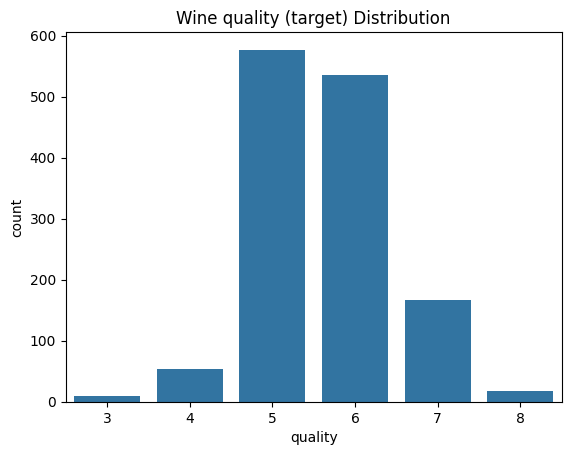

In [15]:
# exploring target distribution (checking imbalance).

print("unique quality values: ", df['quality'].nunique(),"\n") 

print(df["quality"].value_counts().sort_index(),"\n")

sns.countplot(x='quality', data=df)
plt.title("Wine quality (target) Distribution")
plt.show()


### Conclusion:

Target distribution (6 quality classes) is not balanced. Not an issue because task is not classification.

### Next step:

explore and plot features distributions and correlations (histograms, boxplots, scatterplots, correlation heatmap)

inspect shape (skew), spread, outliers...

check whether linear regression even makes sense

check relationships between main features and quality

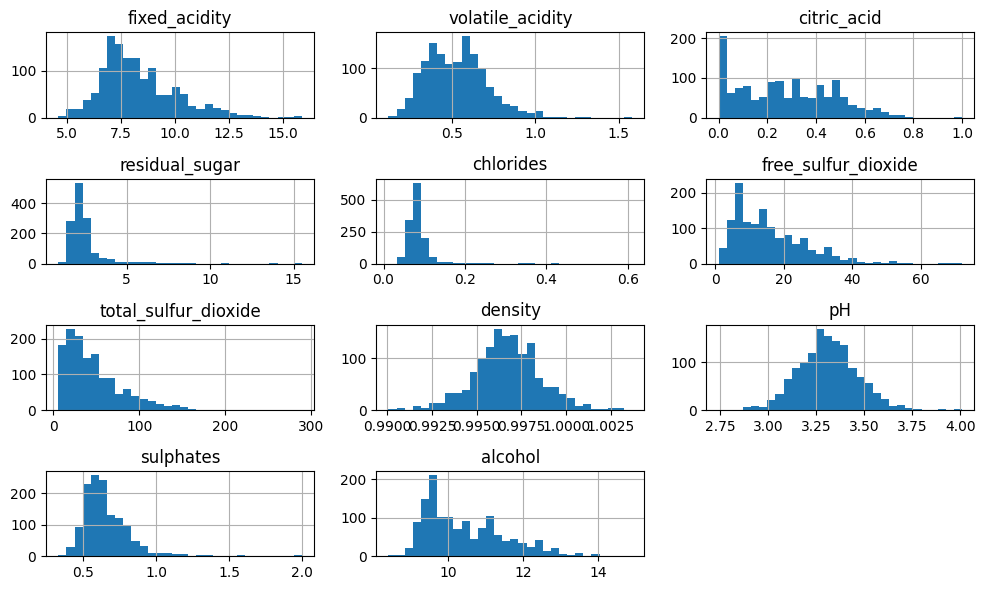

In [16]:
# histograms

X.hist(bins=30, figsize=(10,6))
plt.tight_layout(); plt.show()

### Conclusion:

Most features are strongly right-skewed with long tails: Scaling is needed so that linear models work good.

Many features show multimodal shapes, reflecting different wine production styles - not affecting regression modeling because linear models do not require unimodal or normal feature distributions.

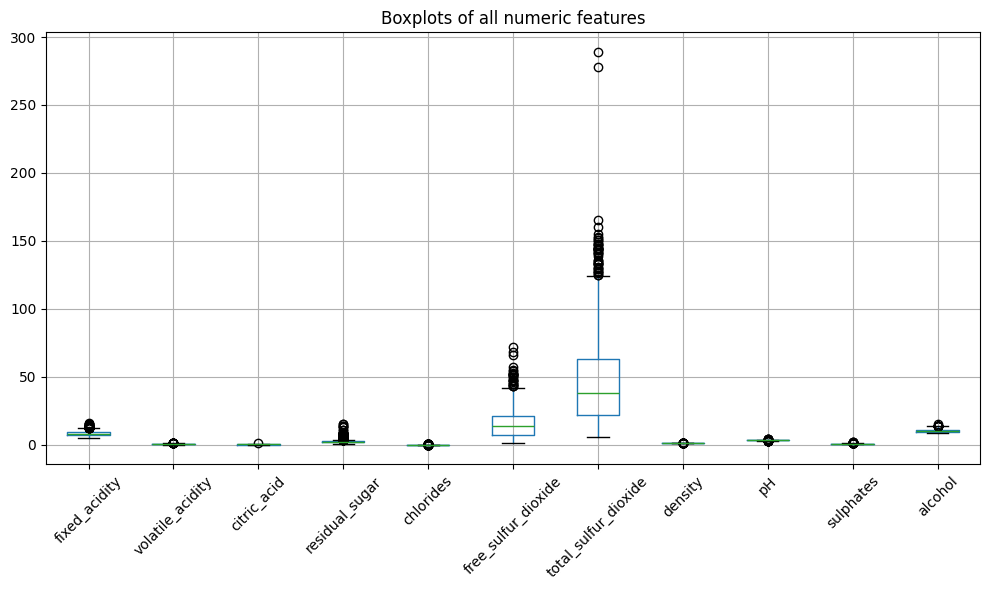

In [17]:
# boxplots (all together)

import matplotlib.pyplot as plt

num_cols = X.columns  # list of all feature columns

plt.figure(figsize=(10, 6))
df[num_cols].boxplot() 
plt.xticks(rotation=45)
plt.title("Boxplots of all numeric features")
plt.tight_layout()
plt.show()


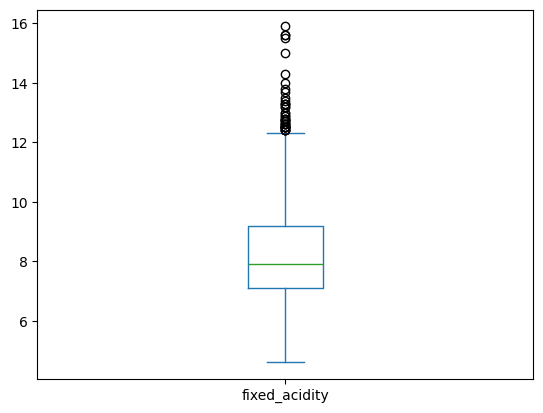

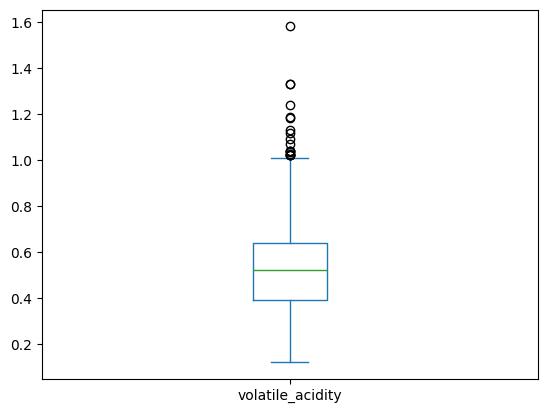

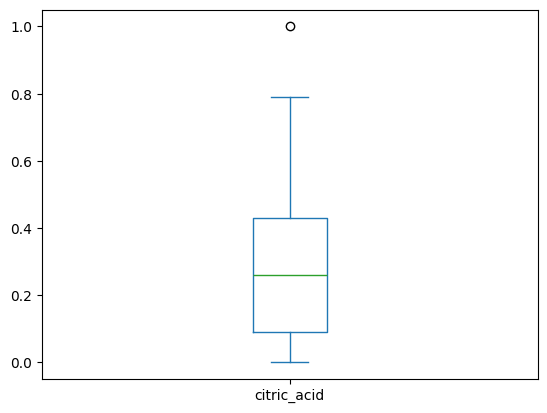

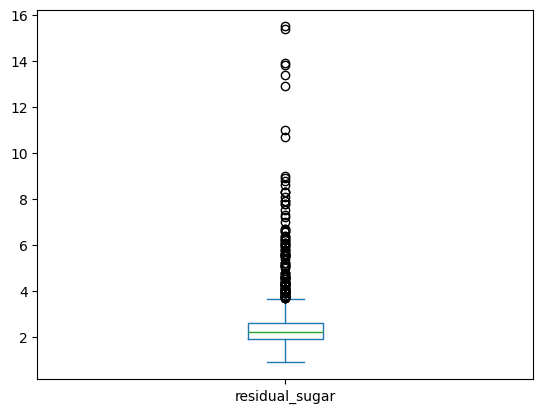

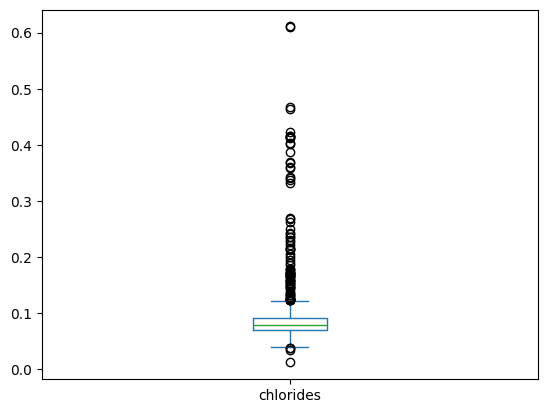

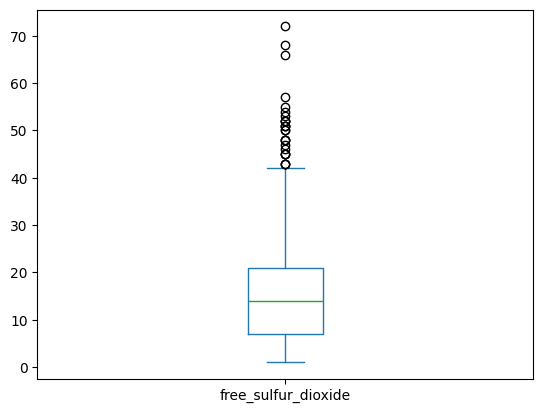

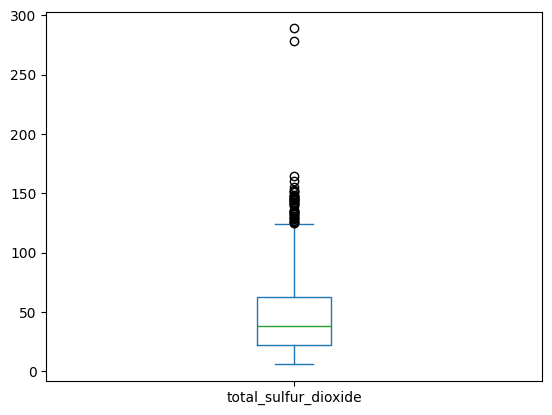

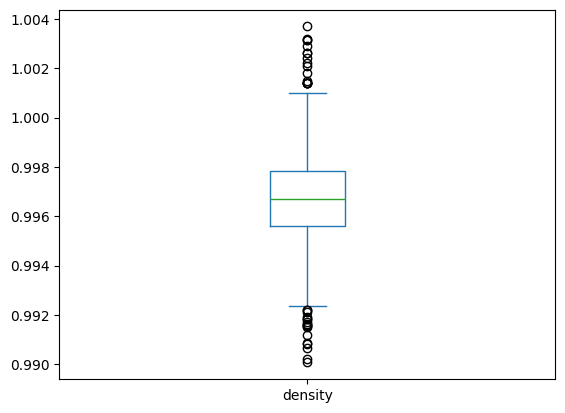

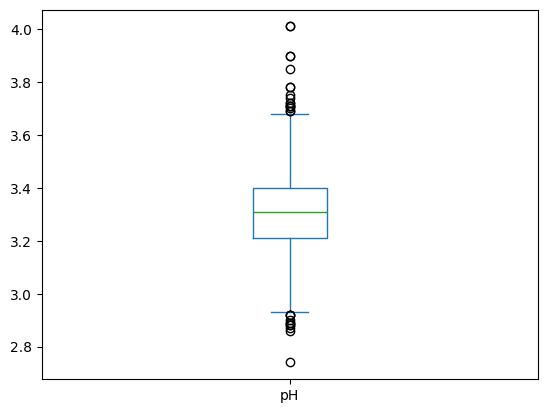

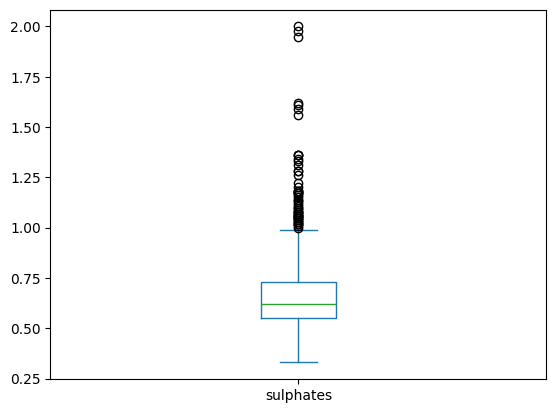

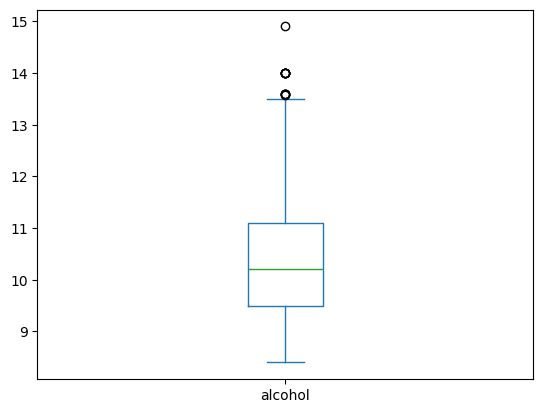

In [18]:
# boxplots (one by one)
for c in num_cols:
    df[c].plot(kind="box")
    plt.show()

### Conclusion:

Most chemical features are right-skewed and contain many high-end outliers (residual sugar, chlorides, sulphates, free and total SO₂). Outliers correspond to real winemaking ranges, not measurement errors and should be kept.

Fixed and volatile acidity show moderate skew with noticeable outliers. 

Density, pH, citric_acid and alcohol are the most compact variables with fewer extreme values. 

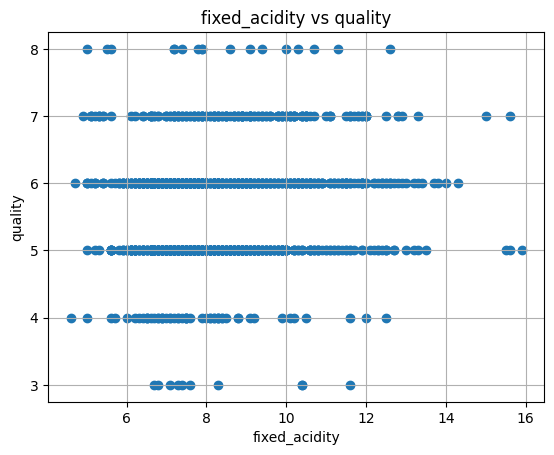

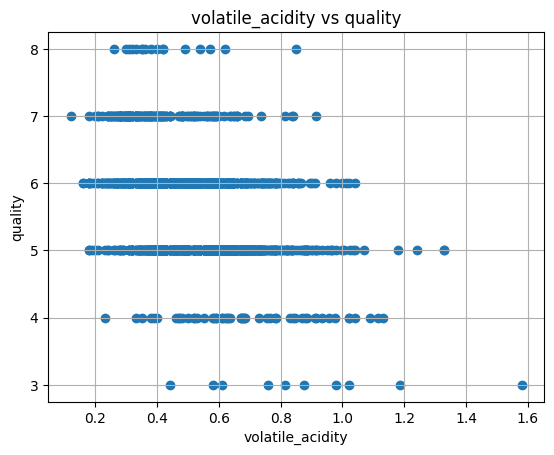

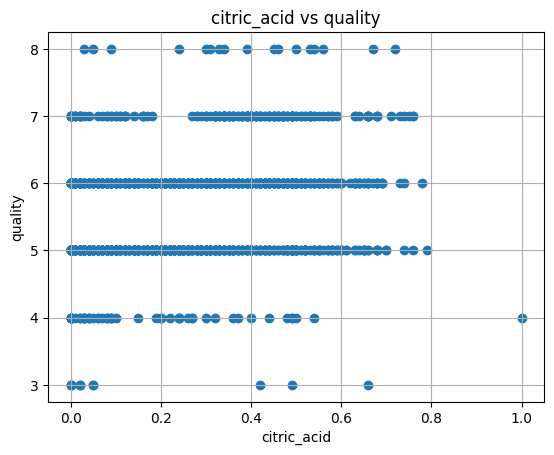

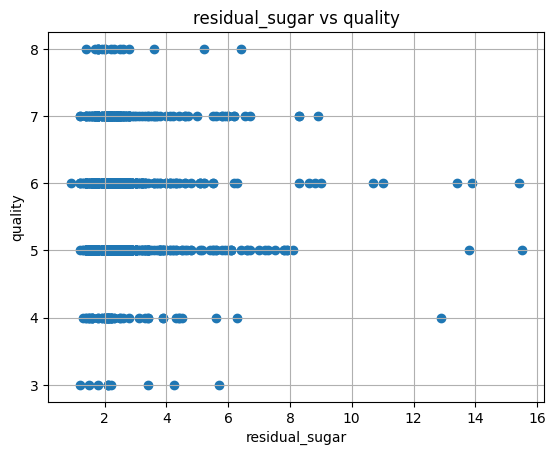

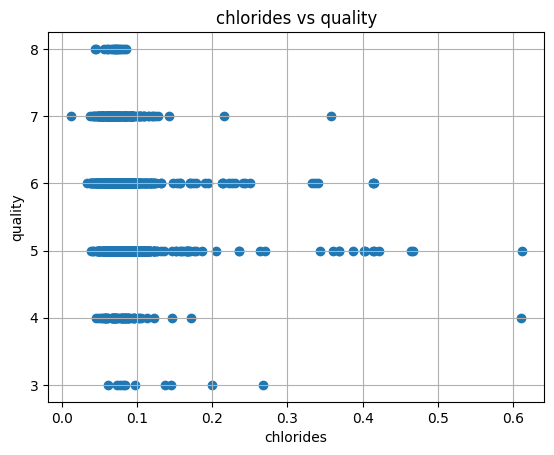

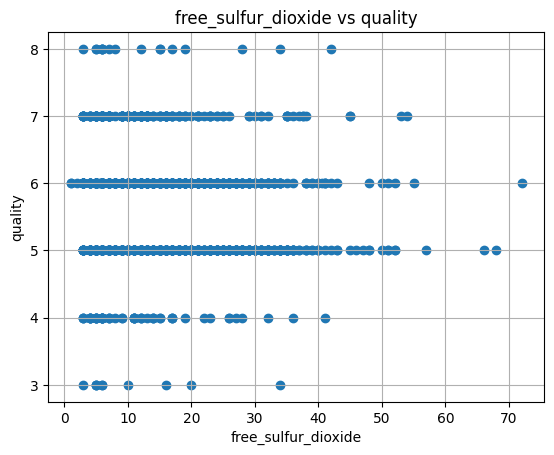

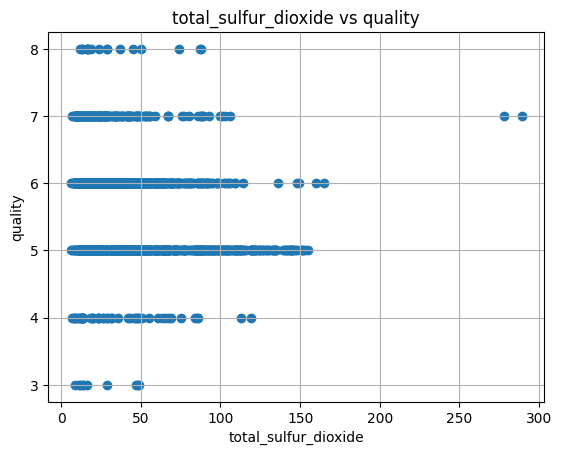

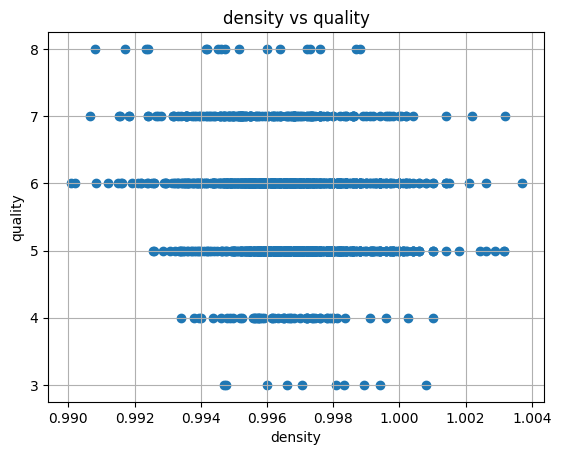

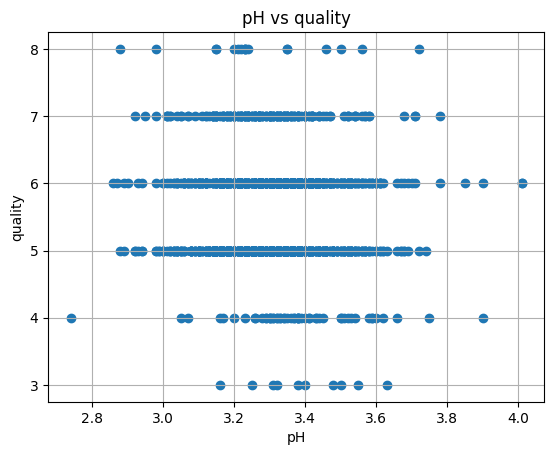

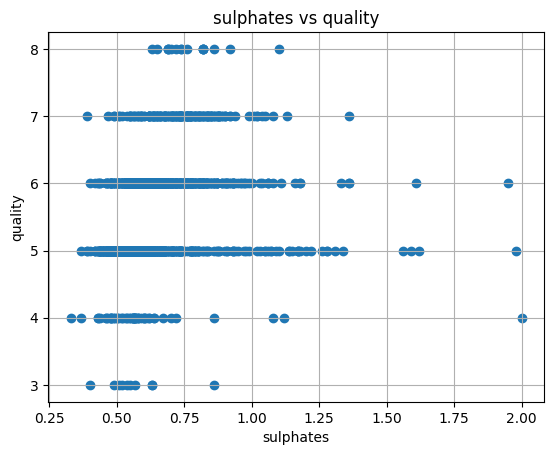

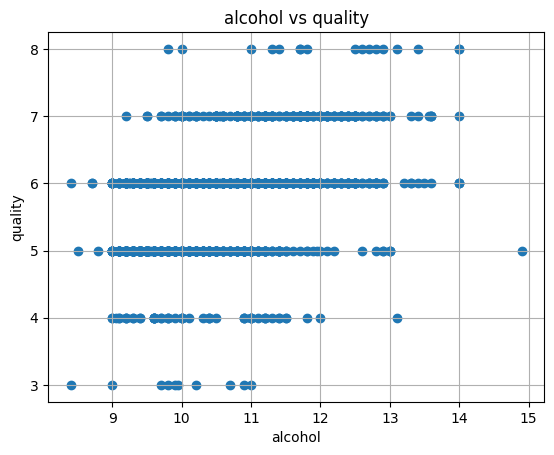

In [19]:
# scatterplots of features vs target 
# inspect Linear or curved patterns, flat or noisy blobs, clustered structures

import matplotlib.pyplot as plt

for c in X.columns:                   
    plt.scatter(df[c], y)   
    plt.title(f"{c} vs quality")
    plt.xlabel(c)
    plt.ylabel('quality')
    plt.grid(True)                                
    plt.show()
    

### Scatterplots interpretation:

Only alcohol shows weak  positive linear relation with wine quality: Higher alcohol does mean higher quality, even though there's a lot of variance. alcohol is the most predictive single feature.

Sulphates and volatile acidity show weak relationships (positive and negative).

All remaining features show no pattern 

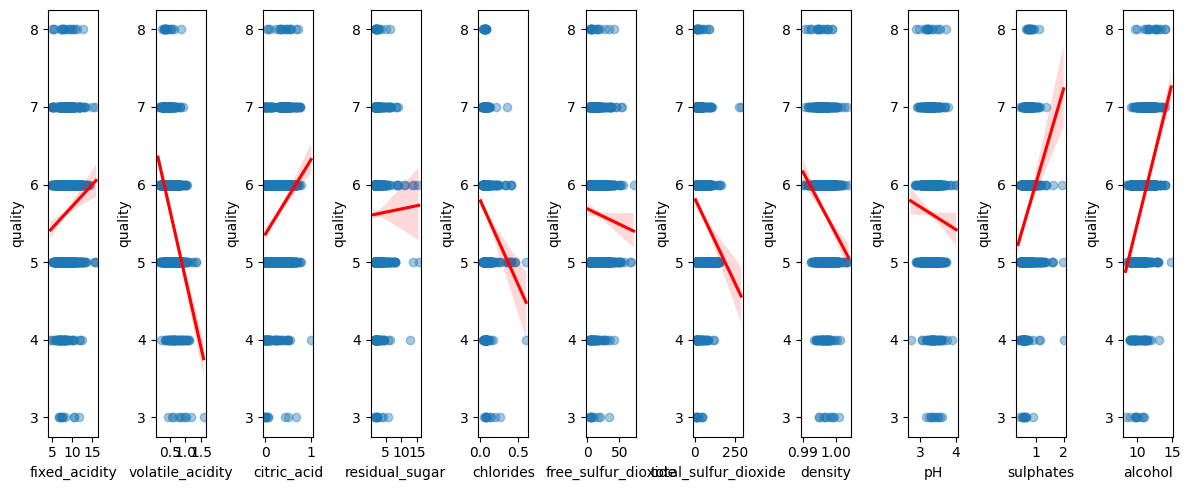

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 11, figsize=(12, 5))

# 0) fixed_acidity → quality
sns.regplot(
    x=df['fixed_acidity'], 
    y=df['quality'], 
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'},
    ax=axes[0]
)

# 1) volatile_acidity → quality
sns.regplot(
    x=df['volatile_acidity'], 
    y=df['quality'], 
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'},
    ax=axes[1]
)

# 2) citric_acid → quality
sns.regplot(
    x=df['citric_acid'], 
    y=df['quality'], 
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'},
    ax=axes[2]
)

# 3) residual_sugar → quality
sns.regplot(
    x=df['residual_sugar'], 
    y=df['quality'], 
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'},
    ax=axes[3]
)

# 4) chlorides → quality
sns.regplot(
    x=df['chlorides'], 
    y=df['quality'], 
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'},
    ax=axes[4]
)

# 5) free_sulfur_dioxide → quality
sns.regplot(
    x=df['free_sulfur_dioxide'], 
    y=df['quality'], 
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'},
    ax=axes[5]
)

# 6) total_sulfur_dioxide → quality
sns.regplot(
    x=df['total_sulfur_dioxide'], 
    y=df['quality'], 
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'},
    ax=axes[6]
)

# 7) density → quality
sns.regplot(
    x=df['density'], 
    y=df['quality'], 
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'},
    ax=axes[7]
)

# 8) pH → quality
sns.regplot(
    x=df['pH'], 
    y=df['quality'], 
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'},
    ax=axes[8]
)

# 9) sulphates → quality
sns.regplot(
    x=df['sulphates'], 
    y=df['quality'], 
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'},
    ax=axes[9]
)

# 10) alcohol → quality
sns.regplot(
    x=df['alcohol'], 
    y=df['quality'], 
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'},
    ax=axes[10]
)

plt.tight_layout()
plt.show()


### Regplot conclusion: 

Quality increases with alcohol, sulphates, and fixed/citric acidity.

Quality decreases with volatile acidity, chlorides, SO₂, density and pH

Quality is mostly unaffected by residual sugar and free SO₂.

In [21]:
print(f"problematic features that TRULY need scaling: \n{df.skew()>1}")

problematic features that TRULY need scaling: 
fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar           True
chlorides                True
free_sulfur_dioxide      True
total_sulfur_dioxide     True
density                 False
pH                      False
sulphates                True
alcohol                 False
quality                 False
dtype: bool


In [22]:
df.corr()["quality"].sort_values(ascending=False)   # correlation values

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric_acid             0.228057
fixed_acidity           0.119024
residual_sugar          0.013640
free_sulfur_dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total_sulfur_dioxide   -0.177855
density                -0.184252
volatile_acidity       -0.395214
Name: quality, dtype: float64

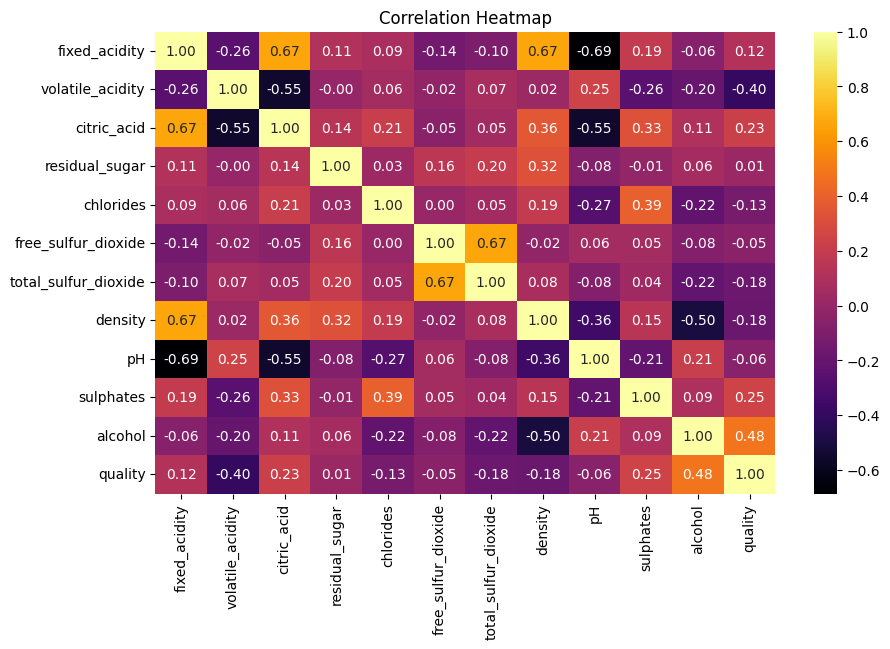

In [23]:
# Correlation Heatmap

plt.figure(figsize=(10,6))
sns.heatmap(
    df.corr(),
    annot=True,       
    cmap="inferno",
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()



### Correlation Heatmap Conclusion:

Only 3–4 features have linear connection to quality and all of these relationships are only moderate: alcohol–quality (+0.48), volatile_acidity–quality (−0.39), sulphates–quality (+0.25), citric_acid–quality (+0.23). The rest of the features contribute weakly.

Is there a multicollinearity? Is correlations between two features > 0.9? No.

Inter-feature strong relationship are explainable byphysics and chemistry laws, like citric acid–fixed acidity (+0.67), free SO₂–total SO₂ (+0.67), and density–alcohol (−0.69). Not significant.


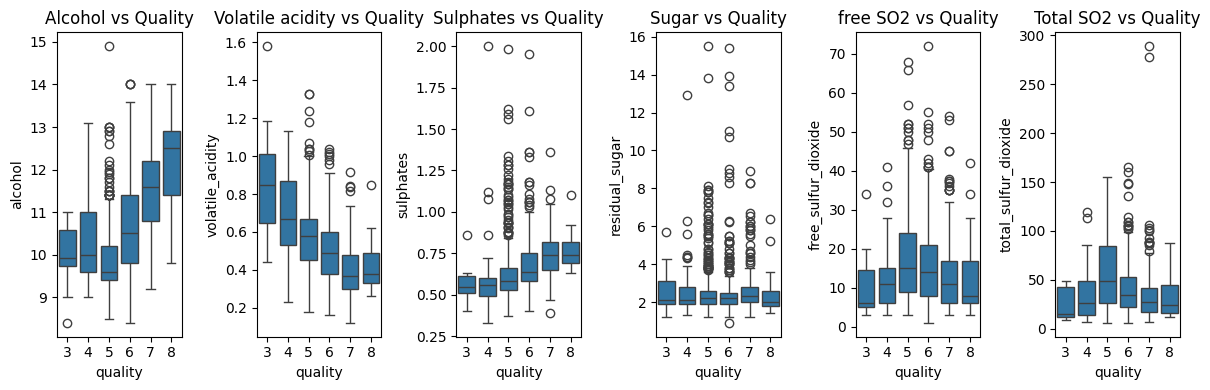

In [24]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 6, 1)
sns.boxplot(x="quality", y="alcohol", data=df)
plt.title("Alcohol vs Quality")

plt.subplot(1, 6, 2)
sns.boxplot(x="quality", y="volatile_acidity", data=df)
plt.title("Volatile acidity vs Quality")

plt.subplot(1, 6, 3)
sns.boxplot(x="quality", y="sulphates", data=df)
plt.title("Sulphates vs Quality")

plt.subplot(1, 6, 4)
sns.boxplot(x="quality", y="residual_sugar", data=df)
plt.title("Sugar vs Quality")

plt.subplot(1, 6, 5)
sns.boxplot(x="quality", y="free_sulfur_dioxide", data=df)
plt.title("free SO2 vs Quality")

plt.subplot(1, 6, 6)
sns.boxplot(x="quality", y="total_sulfur_dioxide", data=df)
plt.title("Total SO2 vs Quality")

plt.tight_layout()
plt.show()


### Boxplot conclusion:

Alcohol vs quality: medians increase with quality

Volatile acidity vs quality: medians decrease with quality (low-quality wines taste more like vinegar)

Other features vs quality: weak or no relation

## Conclusion after EDA:

**Data quality**
- All features are numeric.
- IMPORTANT: Target is ordinal (quasi-categorical). Trully represents continuous sensory judgement, but is recorded as discrete integers. This causes all observations with the same score to align at the same y-level. Regression analysis is appropriate despite the lack of decimal values.
- Dataset is realistic when compared to real-world red wine benchmark values

**Descriptive Statistics**
- volatile_acidity show a number of truly faulty (vinegar-like) wines - these samples will reduce predictive performance. Later might need to be removed.
- residual_sugar (up to 15.5), chlorides (up to 0.61), sulphates (up to 2.0), free_sulfur_dioxide (up to 72) and total_sulfur_dioxide (up to 289) are right-skewed with few extreme right-tail outliers. This will matter for modeling: Linear and polynomial regression will suffer. This issue will be adressed in modeling phase with errors inspection.
- pH and density are symetric and vary only within a narrow interval.
- alcohol content is right-skewed, with most values on the lower end and a long tail of higher values. Compared to typical benchmark values for red wine this dataset stands within the low side of the expected distribution. This dataset samples medium-to-low quality wines with just few high-alcohol, high-quality extremes.

**Target distribution**
- Target has tiny range: only from 3 to 8 and its distribution (6 quality classes) is not balanced, Majority (80%) of wines are of mediocre (5, 6) quality. Excellent (7, 8) and low quality (3, 4) wines are scarce. As a consequence, regression models will likely perform better in the central range (around 5–6) than on extremes. Remember to evaluate errors (MAE or RMSE) per quality class.
- No resampling or class weighting or class grouping will be done because that works for classification, and this task explicitely asks for regression analysis.

**Feature distributions**
- Majority of the features are skewed, long-tailed, multimodal: lots of noise. 

**Feature correlations**
- highly correlated (>0.9) features: none
  
**Feature–Target relationships**
- Wine quality is influenced mostly by alcohol (moderately positive) and volatile acidity (moderately negative), and even these signals are weak.
- Sulphates and citric acid add minor contribution.
- Other variables show wminor or noisy relationships
- Strongest predictor (alcohol) shows a moderate positive correlation with quality (0.48), but alcohol alone does not determine quality.

**comment on patterns, outliers, or potential modeling issues.**

**Patterns:**
- alcohol increases with quality
- volatile_acidity decreases with quality
- sulphates and citric_acid show weak positive trends
- most other features show flat or noisy relationships.
- target is noisy: different tasters, mood, context, uncomparable wine types (both sweet and dry can be high quality for example)

**Outliers:** 
- Right-skewed high values in residual sugar, SO₂ (free and total), and chlorides.
- Outliers appear chemically valid and reflect natural production variability.
- As they represent legitimate data rather than measuring anomalies, outliers are retained for modelling.

Does linear regression make sense here? Yes, because features show non-zero correlation with quality. But, correlations with quality are weak, so linear regression will not fully explain quality variation.

(A) Linear Regression is applicable for alcohol, sulphates, volatile acidity, fixed_acidity and citric acid

(B) Multiple Linear Regression will be done with all 11 features together.

(C) Polynomial Regression will be tried with squaring one feature for starters

**The main modeling challenge is: The chemical data (features) only weakly predicts quality score (target) which itself comes from subjective, noisy human perception rather than measurable features. Linear regression model has to predict a score that is not perfectly consistent in the first place.** 

Because many feature–quality relationships are weak, linear models will underperform, but multiple regression and polynomial terms might better capture the feature's combined effects.

## ... after the EDA, enter Statistical Methods

- Estimation of the unconditional and conditional probabilities,
- Estimation of the parameters of distributions of single variables (mathematical expectation, variance, standard deviation, median, quartiles, quantiles,...),
- Estimation of the parameters of the joint distributions (covariance, correlation coefficient),
- Estimation of PDF based on histogram, and nonparametric hypothesis testing of distributions using Kolmogorov-Smirnov and Chi-squared test,
- Estimation of confidence intervals of certain parameters,
- Parametric hypothesis testing.

In [25]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


# IV 

# Estimation of the unconditional and conditional probabilities:

### unconditional probability:

What is he probability that sample is of quality 8?

P(quality=8) = (number of samples with quality 9) / (number of all samples)


In [26]:
p_q8 = (df["quality"] == 8).mean()
print(p_q8)

P_quality_8 = (df["quality"] == 8).sum() / len(df)
print(P_quality_8)

print(f"Only {(p_q8*100):.2f} % of all wines in the Red wines dataset have quality 8.")


0.012509197939661517
0.012509197939661517
Only 1.25 % of all wines in the Red wines dataset have quality 8.


### conditional probability:

What is the probability that sample is of quality 7 given that its % of alcohol is high? 

What is the proportion of high-alcohol wines that have quality 7.

P( quality=7 | alcohol>12 ) 

$$
P(\text{quality}=7 \mid \text{alcohol}>12)
=
\frac{P(\text{quality}=7,\ \text{alcohol}>12)}
     {P(\text{alcohol}>12)}
$$



In [27]:
# event A: quality = 7
# event B: alcohol > 12

A = (df["quality"] == 7)
B = (df["alcohol"] > 12)

count_A_and_B = (A & B).sum()
count_B       = B.sum()

p_A_given_B = count_A_and_B / count_B

# print(type(p_A_given_B))

print(f"Among wines with >12% alcohol, {(p_A_given_B * 100):.2f} % have quality 7.")

# Probability_A_given_B = df.loc[df["alcohol"] > 12, "quality"].eq(7).mean()
# Probability_A_given_B = (df.loc[df["alcohol"] > 12, "quality"]==7).mean()


Among wines with >12% alcohol, 39.06 % have quality 7.


### assymetry of conditional probability:

What is the probability that sample features high % of alcohol, given that its quality is 7 ?

What is the proportion of quality-7 wines that have high-alcohol.

$$
P(\text{alcohol}>12 \mid \text{quality}=7 )
=
\frac{P(\text{quality}=7,\ \text{alcohol}>12)}
     {P(\text{quality}=7)}
$$

In [28]:
# event A: quality = 7
# event B: alcohol > 12

A = (df["quality"] == 7)
B = (df["alcohol"] > 12)

count_A_and_B = (A & B).sum()
count_A       = A.sum()

p_B_given_A = count_A_and_B / count_A

print(p_B_given_A)

Probability_B_given_A = ( df[df["quality"] == 7]["alcohol"] > 12).mean()

print(f"Among wines with quality 7, {(Probability_B_given_A * 100):.2f}% have alcohol above 12%.")


0.2994011976047904
Among wines with quality 7, 29.94% have alcohol above 12%.


### Conditional probabilities:
How much does high alcohol really change the chance of high quality?

In [29]:
# Conditional probabilities:
# How much does high alcohol really change the chance of high quality?

# --- events ---
high_quality = df["quality"] >= 7          # event Q: good wine
high_alc     = df["alcohol"] > 12          # event A: high alcohol (pick any cutoff)

# unconditional P(Q)
p_Q = high_quality.mean()

# conditional P(Q | A) and P(Q | not A)
p_Q_given_A     = high_quality[high_alc].mean()
p_Q_given_not_A = high_quality[~high_alc].mean()

print(f"P(high quality)            = {p_Q:.3f}")
print(f"P(high quality | high alc) = {p_Q_given_A:.3f}")
print(f"P(high quality | low alc)  = {p_Q_given_not_A:.3f}")

print()
print("P(Q | high alc) is 4 times larger than P(Q | low alc): about 46 vs 10 good bottles per 100")

print("Still, more than half of high-alcohol wines are still not high quality, so alcohol is a strong predictor, not a silver bullet.")


P(high quality)            = 0.135
P(high quality | high alc) = 0.461
P(high quality | low alc)  = 0.102

P(Q | high alc) is 4 times larger than P(Q | low alc): about 46 vs 10 good bottles per 100
Still, more than half of high-alcohol wines are still not high quality, so alcohol is a strong predictor, not a silver bullet.


# V 

# Estimation of the parameters of distributions of single variables:

Describe shape and spread of each variable:
- Mean (mathematical expectation)
- Variance
- Standard deviation
- Median
- Quartiles (Q1, Q2, Q3)
- Quantiles (e.g., 0.1, 0.9)


In [30]:
display(df.describe().T)

extra_stats = pd.DataFrame({
    "median": df.median(),
    "variance": df.var(),
    "skewness": df.skew(),
    "kurtosis": df.kurt(),
    "IQR": df.quantile(0.75) - df.quantile(0.25),
    "Q10": df.quantile(0.10),
    "Q90": df.quantile(0.90)
})
display(extra_stats)


,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile_acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric_acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual_sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free_sulfur_dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total_sulfur_dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


,median,variance,skewness,kurtosis,IQR,Q10,Q90
fixed_acidity,7.9000,3.017134,0.941041,1.049673,2.10000,6.500000,10.7000
volatile_acidity,0.5200,0.033500,0.729279,1.249243,0.25000,0.310000,0.7600
citric_acid,0.2600,0.038235,0.312726,-0.788921,0.34000,0.010000,0.5300
residual_sugar,2.2000,1.828752,4.548153,29.364592,0.70000,1.700000,3.4600
chlorides,0.0790,0.002438,5.502487,38.624653,0.02100,0.060000,0.1100
free_sulfur_dioxide,14.0000,109.145456,1.226579,1.892691,14.00000,5.000000,31.0000
total_sulfur_dioxide,38.0000,1116.157653,1.540368,4.042257,41.00000,14.000000,94.0000
density,0.9967,0.000003,0.044778,0.830659,0.00222,0.994472,0.9991
pH,3.3100,0.024036,0.232032,0.879790,0.19000,3.120000,3.5100
sulphates,0.6200,0.029127,2.406505,11.102282,0.18000,0.500000,0.8500


# VI 

# Estimation of the parameters of the joint distributions (covariance, correlation coefficient):

Inspect how 2 variables move together

Relationships between two variables:

Covariance:
Measures joint variability (sign shows direction, magnitude not scaled).

Correlation coefficient (Pearson):
Measures strength and direction on a scale from -1 to 1

Compute cov and corr for:

- alcohol, quality

- volatile_acidity, quality

- alcohol, volatile_acidity


In [31]:
# (1) alcohol vs quality
corr_a_q = df["alcohol"].corr(df["quality"])
cov_a_q  = df["alcohol"].cov(df["quality"])

# (2) volatile_acidity vs quality
corr_va_q = df["volatile_acidity"].corr(df["quality"])
cov_va_q  = df["volatile_acidity"].cov(df["quality"])

# (3) alcohol vs volatile_acidity
corr_a_va = df["alcohol"].corr(df["volatile_acidity"])
cov_a_va  = df["alcohol"].cov(df["volatile_acidity"])

print(f"alcohol vs quality           | cov = {cov_a_q:.3f},  corr = {corr_a_q:.3f}")
print(f"volatile_acidity vs quality  | cov = {cov_va_q:.3f}, corr = {corr_va_q:.3f}")
print(f"alcohol vs volatile_acidity  | cov = {cov_a_va:.3f}, corr = {corr_a_va:.3f}")
print()
print("alcohol = quality helper \nvolatile_acidity = quality killer \nthey’re not strongly tied, just weakly related.")


alcohol vs quality           | cov = 0.428,  corr = 0.480
volatile_acidity vs quality  | cov = -0.060, corr = -0.395
alcohol vs volatile_acidity  | cov = -0.039, corr = -0.198

alcohol = quality helper 
volatile_acidity = quality killer 
they’re not strongly tied, just weakly related.


# VII

# Estimation of PDF based on histogram and nonparametric hypothesis testing of distributions using Kolmogorov-Smirnov and Chi-squared test:

- PDF estimation via normalized histograms.

- Nonparametric distribution tests using Kolmogorov–Smirnov. KS compares empirical CDF with specified theoretical CDF (like Normal).

- Nonparametric distribution tests Using χ² (chi-square). Chi-square compares binned frequencies to expected frequencies under a theoretical distribution (like Normal). Chi-square depends on binning choice, unlike KS.


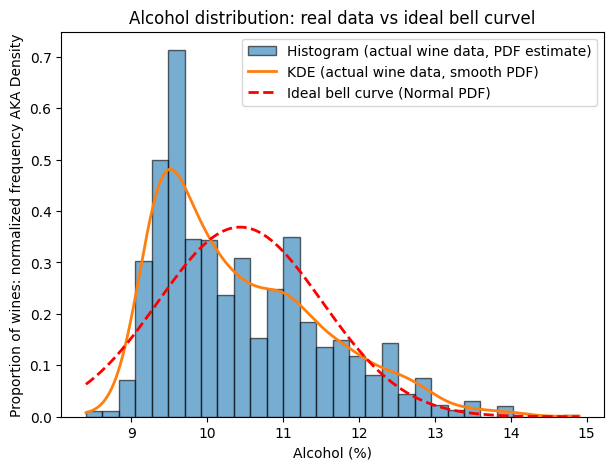

from the graph above I learn that alcohol is right skewed, not symmetric: 
most of wines alcohol % is between 9% and 12% with long right tail 
.mean() is not representative for typical alcohol level, 
.median() is more representative as a typical value


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

x = df["alcohol"].values                     # data
mu, sigma = x.mean(), x.std()                # mean and std of the actual data
xs = np.linspace(x.min(), x.max(), 500)      # x-axis grid (for KDE... more points means smoother curve)

plt.figure(figsize=(7,5))
plt.hist(x, bins=30, density=True, alpha=0.6, edgecolor="k", label="Histogram (actual wine data, PDF estimate)") 
plt.plot(xs, gaussian_kde(x)(xs), linewidth=2, label="KDE (actual wine data, smooth PDF)")
plt.plot(xs, norm.pdf(xs, mu, sigma), "r--", linewidth=2, label="Ideal bell curve (Normal PDF)")
plt.xlabel("Alcohol (%)")
plt.ylabel("Proportion of wines: normalized frequency AKA Density")
plt.title("Alcohol distribution: real data vs ideal bell curvel")
plt.legend()
plt.show()

print("from the graph above I learn that alcohol is right skewed, not symmetric: \n"
      "most of wines alcohol % is between 9% and 12% with long right tail \n"
      ".mean() is not representative for typical alcohol level, \n"
      ".median() is more representative as a typical value")

# print("A histogram estimates a probability density function (PDF). \nBecause density=True, the area under all bars ≈ 1. \nRaw counts are turned into into density, into “probability per unit of x”.\nPeaks represent ranges where values occur most often.\nThe shape shows skewness, modality, and spread without assuming any theoretical distribution.")

# print("The KDE curve above is smooth, nonparametric estimate of the same PDF computed by histogram \nWith KDE, each data point becomes a small bell curve which overlap and blend \nnonparametric means that no assumption of distribution exists: curve shape is learned only from the data.")

# alt: sns.histplot(df["alcohol"], bins=30, stat="density", kde=True


H₀ (null): data comes from a Normal distribution 
H₁ (alt): data does not come from Normal distribution 
If p < 0.05 → reject H₀ → NOT normal 
If p ≥ 0.05 → fail to reject H₀ → could be normal

KS statistic: 0.1240
p-value (how well the cumulative shape matches): 0.0000

The KS statistic quantifies the maximum vertical distance 
between the empirical and theoretical cumulative distribution functions. 
It captures the single point at which the theoretical model deviates most from the observed cumulative distribution.

Here Observed and Normal CDFs appear visually roughly similar but KS test detects maximum deviation of 12%.



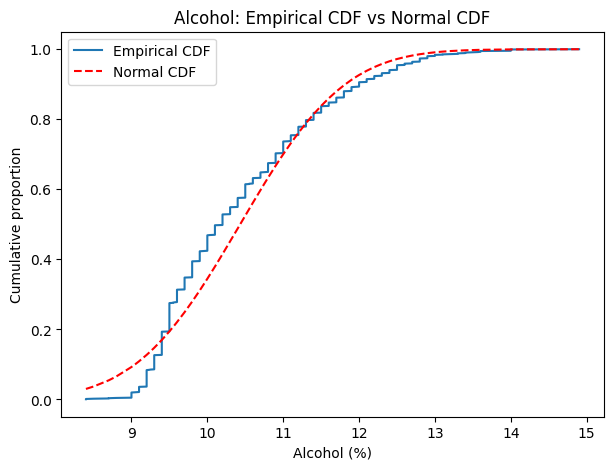

In [33]:
# KS: compares observed CDF vs Normal CDF.
# test  if a variable (alcohol) comes from a specific theoretical distribution (Normal distribution here).

from scipy.stats import kstest
import numpy as np

x = df["alcohol"]

# fit normal distribution from data
mu, sigma = x.mean(), x.std()

ks_stat, p_value = kstest(x, 'norm', args=(mu, sigma))

print("H₀ (null): data comes from a Normal distribution \nH₁ (alt): data does not come from Normal distribution \nIf p < 0.05 → reject H₀ → NOT normal \nIf p ≥ 0.05 → fail to reject H₀ → could be normal")
print()
print(f"KS statistic: {ks_stat:.4f}")
print(f"p-value (how well the cumulative shape matches): {p_value:.4f}")
print()
print("The KS statistic quantifies the maximum vertical distance \nbetween the empirical and theoretical cumulative distribution functions. \nIt captures the single point at which the theoretical model deviates most from the observed cumulative distribution.")
print()
print("Here Observed and Normal CDFs appear visually roughly similar but KS test detects maximum deviation of 12%.")
print()
# observed CDF vs Normal distribution CDF graph:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.sort(df["alcohol"].values)
n = len(x)

# empirical CDF
ecdf = np.arange(1, n+1) / n

# fitted normal CDF
mu, sigma = x.mean(), x.std()
normal_cdf = norm.cdf(x, mu, sigma)

plt.figure(figsize=(7,5))
plt.plot(x, ecdf, label="Empirical CDF")
plt.plot(x, normal_cdf, "r--", label="Normal CDF")
plt.xlabel("Alcohol (%)")
plt.ylabel("Cumulative proportion")
plt.title("Alcohol: Empirical CDF vs Normal CDF")
plt.legend()
plt.show()

H₀ (null): data comes from a Normal distribution 
H₁ (alt): data does not come from Normal distribution 
If p_value_chi2 < 0.05 → reject H₀ → NOT normal 
If p_value_chi2 ≥ 0.05 → fail to reject H₀ → could be normal

Chi-square statistic: 408.81
Chi-square p-value (how well the bin frequencies match): 0.0000

Chi-square statistic measures how much observed bin counts differ from those predicted by a Normal distribution, 
relative to the expected counts in each bin. 
The sum of these relative discrepancies across bins quantifies the overall mismatch between the data and the Normal model. 


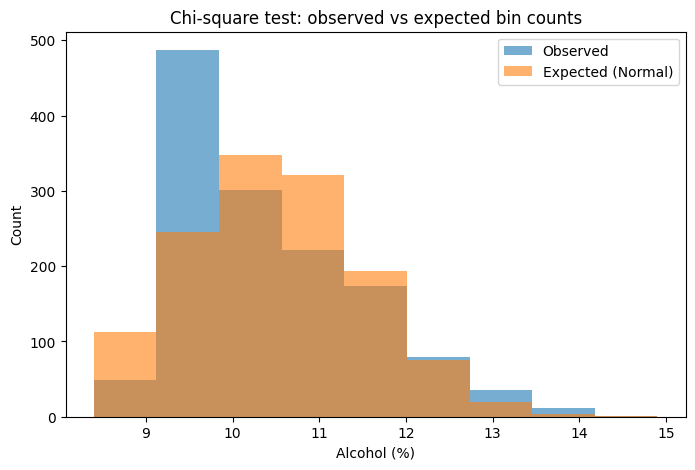

In [34]:
# Chi-square: compares observed bin counts vs expected bin counts.

import numpy as np
from scipy.stats import norm, chisquare

x = df["alcohol"].values
n = len(x)

# 1) Fit Normal from data
mu, sigma = x.mean(), x.std()                          # creates the reference model: Normal

# 2) Choose bins
num_bins = 10
bins = np.linspace(x.min(), x.max(), num_bins + 1)

# 3) Observed counts per bin
obs_counts, _ = np.histogram(x, bins=bins)             # counts how many wines fall into each bin.

# 4) Expected counts per bin for Normal(μ, σ)
cdf_vals = norm.cdf(bins, loc=mu, scale=sigma)
bin_probs = np.diff(cdf_vals)
exp_counts = bin_probs * n

# 5) Keep only bins with enough expected count
mask = exp_counts > 5
obs = obs_counts[mask]
exp = exp_counts[mask]

# Rescale expected so sums match (fixes the error)
exp = exp * (obs.sum() / exp.sum())

# 6) Chi-square test
chi2_stat, p_value_chi2 = chisquare(f_obs=obs, f_exp=exp)

print("H₀ (null): data comes from a Normal distribution \nH₁ (alt): data does not come from Normal distribution \nIf p_value_chi2 < 0.05 → reject H₀ → NOT normal \nIf p_value_chi2 ≥ 0.05 → fail to reject H₀ → could be normal")
print()
print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"Chi-square p-value (how well the bin frequencies match): {p_value_chi2:.4f}")
print()
print("Chi-square statistic measures how much observed bin counts differ from those predicted by a Normal distribution, \nrelative to the expected counts in each bin. \nThe sum of these relative discrepancies across bins quantifies the overall mismatch between the data and the Normal model. ")

# Chis squared viz:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = df["alcohol"].values
mu, sigma = x.mean(), x.std()
n = len(x)

bins = np.linspace(x.min(), x.max(), 10)
obs, _ = np.histogram(x, bins=bins)

cdf = norm.cdf(bins, mu, sigma)
exp = np.diff(cdf) * n

bin_centers = 0.5 * (bins[:-1] + bins[1:])
width = np.diff(bins)

plt.figure(figsize=(8,5))
plt.bar(bin_centers, obs, width=width, alpha=0.6, label="Observed")
plt.bar(bin_centers, exp, width=width, alpha=0.6, label="Expected (Normal)")
plt.xlabel("Alcohol (%)")
plt.ylabel("Count")
plt.title("Chi-square test: observed vs expected bin counts")
plt.legend()
plt.show()

### Histogram, KS and Chi test conclusion:

Alcohol is not normally distributed.

Normality tests (KS and chi-square) formally confirm the conclusions already visible in histogram. 
Together, they give evidence of the alcohol's distribution shape and deviations from Normality.

Outcome: 

Will use MEDIAN instead of MEAN to describe alcohol.

Predictions based on alcohol will be better near center than on extremes.

RMSE will not be small.


# VIII
# Estimation of confidence intervals of certain parameters,

Confidence Intervals for:
- CI for mean alcohol
- CI for mean quality
- CI for proportion of high-quality wines (proportion of wines with quality ≥ 7)

In [35]:
# Using t-distribution because σ is unknown - do not know how much alcohol varies across all wines that could exist.

import numpy as np
from scipy import stats

x = df["alcohol"].values
n = len(x)
mean = x.mean()
std = np.std(x, ddof=1)    # NumPy array method: Bessel’s correction: treats data as a sample from a population, not as entire population

alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)

ci_low  = mean     - t_crit         * std / np.sqrt(n)
#   CI  = estimate ± critical value * standard error
ci_high = mean     + t_crit         * std / np.sqrt(n)

print(f"95% CI for mean alcohol: ci_low: {ci_low:.4f}, ci_high: {ci_high:.4f}")


95% CI for mean alcohol: ci_low: 10.3747, ci_high: 10.4899


In [36]:
# Using t-distribution because σ is unknown: I don’t know the true average quality of all wines, only the average in this dataset

import numpy as np
from scipy import stats

x = df["quality"].values
n = len(x)
mean = x.mean()
std = np.std(x, ddof=1)    # NumPy array method: Bessel’s correction: treats data as a sample from a population, not as entire population

alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)   # Percent Point Function - What value (point) cuts off a given percent of the distribution?
                                            # How many standard errors away from the average do I need to go to get a 95% confidence interval? 

ci_low  = mean     - t_crit         * std / np.sqrt(n)
#   CI  = estimate ± critical value * standard error
ci_high = mean     + t_crit         * std / np.sqrt(n)

print(f"95% CI for mean quality: ci_low: {ci_low:.4f}, ci_high: {ci_high:.4f}")


95% CI for mean quality: ci_low: 5.5794, ci_high: 5.6671


In [37]:
# Normal approximation is used due to large sample size.
# def: The sampling distribution of the sample proportion is approximately Normal when the sample size is large enough.

import numpy as np
from scipy.stats import norm

quality_high = (df["quality"] >= 7)
p = quality_high.mean()
n = len(df)

alpha = 0.05
z_crit = norm.ppf(1 - alpha/2)

ci_low  = p        - z_crit         * np.sqrt(p*(1-p)/n)
#   CI  = estimate ± critical value * standard error
ci_high = p        + z_crit         * np.sqrt(p*(1-p)/n)

print(f"95% CI for proportion of high-quality (>7) wines: ci_low: {ci_low:.4f}, ci_high: {ci_high:.4f}")


95% CI for proportion of high-quality (>7) wines: ci_low: 0.1172, ci_high: 0.1536


#### Conclusion:

I estimated 95% confidence intervals for several key parameters of the red wine dataset.

The mean alcohol content lies between 10.37% and 10.49%, confirming that the dataset mostly covers medium-strength red wines.

The mean quality is between 5.58 and 5.67, indicating that the typical wine in this dataset is of moderate quality, not very poor or excellent.

The proportion of high-quality wines (quality ≥ 7) lies between 11.7% and 15.4%, so only a relatively small fraction of the wines are rated as high quality.

# IX
# Parametric hypothesis testing

Two-sample t-tests
- Compare mean alcohol for quality = 5 vs 6
- Compare volatile acidity for 5 vs 6

Correlation significance (p-value) tests
- alcohol and quality
- volatile_acidity and quality
- sulphates and quality


In [38]:
# Two-sample Welch t-test: alcohol for quality 5 vs 6
from scipy import stats

alc_q5 = df.loc[df["quality"] == 5, "alcohol"]
alc_q6 = df[df["quality"] == 6]["alcohol"]

t_stat, p_val = stats.ttest_ind(                          # ttest_ind compares two group means
    alc_q5, 
    alc_q6, 
    equal_var=False                                       # Test is Welch (=False), not Students(=True)! Not assuming equal variances
)

print(f"A two-sample Welch t-test compares the average alcohol content of wines rated 5 and 6, where most samples are:")
print(f"t-statistic (how many standard errors apart the two group means are) = {t_stat:.3f}\np-value (how unlikely that distance is by chance) = {p_val:.4e}")
print()

#

print("same test for volatile acidity:")
va_q5 = df.loc[df["quality"] == 5, "volatile_acidity"]
va_q6 = df.loc[df["quality"] == 6, "volatile_acidity"]

t_stat, p_val = stats.ttest_ind(va_q5, va_q6, equal_var=False)

print(f"Welch t-test (volatile acidity): quality 5 vs 6")
print(f"t = {t_stat:.3f}, p = {p_val:.4e}")


A two-sample Welch t-test compares the average alcohol content of wines rated 5 and 6, where most samples are:
t-statistic (how many standard errors apart the two group means are) = -13.937
p-value (how unlikely that distance is by chance) = 2.4747e-40

same test for volatile acidity:
Welch t-test (volatile acidity): quality 5 vs 6
t = 8.263, p = 4.0138e-16


### Two Two-Sample t-test conclusion: What chemically changes when wine moves one step up in quality?

Tests confirm that higher-quality wines have significantly higher alcohol content and significantly lower volatile acidity.

t-statistic (mean difference divided by the standard error of the difference) values are extremely large in both tests.

The extremely small p-values formally confirm that the differences between two groups are real and not due to random variation.

In [39]:
# Correlation significance (Pearson): is linear correlation between 2 features significantly ≠ 0.
# Confirm  which feature has real linear signal, not just random noise.

from scipy import stats

pairs = {
    "alcohol": df["alcohol"],
    "volatile_acidity": df["volatile_acidity"],
    "sulphates": df["sulphates"]
}

for name, x in pairs.items():
    r, p = stats.pearsonr(x, df["quality"])
    print(f"Pearson: {name} vs quality → r = {r:.3f}, p = {p:.2e}")

Pearson: alcohol vs quality → r = 0.480, p = 2.28e-79
Pearson: volatile_acidity vs quality → r = -0.395, p = 4.93e-52
Pearson: sulphates vs quality → r = 0.249, p = 1.26e-20


### Correlation tests conclusion:

The correlation heatmap was used in EDA earlier, and now pearsonr formally tests whether the observed linear correlations between selected features and quality are statistically different from zero.

All three p-values are way below 0.05, essentially zero. This proves that correlations are statistically significant.


# final conclusion for stats methods

Statistical methods confirm the EDA findings: alcohol improves quality, volatile acidity reduces it, and sulphates have a weaker positive effect. These signals are statistically significant but moderate in strength (|r| ≈ 0.25–0.48), confirming that wine quality is only partially predictable from chemical features.

Statistical diagnostics confirmed skewness, heavy tails, and moderate nonlinearity in the data, suggesting that linear regression may have limited predicting power. But the task here is to do regression analysis, so we proceed with modeling:


# X

# ... after Statistical Methods, enter REGRESSION Modeling

-    prepare data for scikit
-    prepare data for statsmodels.formula
-    create baseline metrics - median
-    model simple linear regression scikit and formula alkohol
-    model multiple regression scikit and formula - all features
-    model polynomial regression scikit and formula - square alcohol
-    pick best model and predict on TEST
-    check assumptions via residuals (errors)
-    check under/over fitting

In [40]:
# Split dataset into train/validation/test sets

from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=SEED)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=SEED)

print("Train/Val/Test for sklearn:", X_train.shape, X_val.shape, X_test.shape)

Train/Val/Test for sklearn: (951, 11) (204, 11) (204, 11)


In [41]:
# For formula API, DataFrame with target inside is needed
# to the feature matrices (11 columns) add the target as the 12th column.
# train_df = pd.concat([X_train, y_train], axis=1)

train_df = X_train.copy()
train_df["quality"] = y_train

val_df = X_val.copy()
val_df["quality"] = y_val

test_df = X_test.copy()
test_df["quality"] = y_test

print("train/val/test for statsmodels:", train_df.shape, val_df.shape, test_df.shape)


train/val/test for statsmodels: (951, 12) (204, 12) (204, 12)


In [42]:
# Baseline (median of quality) metrics:

import numpy as np                                                                # for sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score     # metrics

# Baseline prediction = median quality on TRAIN set
baseline_value = y_train.median()

# Every prediction = baseline median
y_train_pred_baseline = pd.Series(baseline_value, index=y_train.index)  # train preds - all equal single integers per every row
y_val_pred_baseline   = pd.Series(baseline_value, index=y_val.index)    # val preds
y_test_pred_baseline  = pd.Series(baseline_value, index=y_test.index)   # test preds

# Save MAE and RMSE and R2 for each portion of data"

# TRAIN
train_mae_baseline = mean_absolute_error(y_train, y_train_pred_baseline)  # MAE train
train_rmse_baseline = np.sqrt(mean_squared_error(y_train, y_train_pred_baseline))  # RMSE train
train_r2_baseline = r2_score(y_train, y_train_pred_baseline)  # R2 train

# VALIDATION
val_mae_baseline = mean_absolute_error(y_val, y_val_pred_baseline)        # MAE val
val_rmse_baseline = np.sqrt(mean_squared_error(y_val, y_val_pred_baseline))  # RMSE val
val_r2_baseline = r2_score(y_val, y_val_pred_baseline)  # R2 val

# TEST
test_mae_baseline = mean_absolute_error(y_test, y_test_pred_baseline)     # MAE test
test_rmse_baseline = np.sqrt(mean_squared_error(y_test, y_test_pred_baseline))  # RMSE test
test_r2_baseline = r2_score(y_test, y_test_pred_baseline)  # R2 test

print("Baseline (median of quality) metrics:")
print(f"Train  - MAE: {train_mae_baseline:.3f}, RMSE: {train_rmse_baseline:.3f}, R2: {train_r2_baseline:.3f}")
print(f"Val    - MAE: {val_mae_baseline:.3f}, RMSE: {val_rmse_baseline:.3f}, R2: {val_r2_baseline:.3f}")
print(f"Test   - MAE: {test_mae_baseline:.3f}, RMSE: {test_rmse_baseline:.3f}, R2: {test_r2_baseline:.3f}")


Baseline (median of quality) metrics:
Train  - MAE: 0.672, RMSE: 0.902, R2: -0.193
Val    - MAE: 0.652, RMSE: 0.888, R2: -0.181
Test   - MAE: 0.696, RMSE: 0.939, R2: -0.335


### weakest real model must beat this baseline on validation and test sets:
- MAE must be lower than ≈ 0.65 to 0.70
- RMSE  must be lower than ≈ 0.89 to 0.94
- R2  must be higher than ≈ -0.18 to -0.33

# XI

# Linear Regression via Scikit-learn

In [43]:
# Linear Regression via Scikit-learn: quality ~ alcohol

from sklearn.linear_model import LinearRegression          # simple linear regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np                                         # for sqrt

# Taking only alcohol column as 2D input (2D input is scikit requirement)
X_train_alc = X_train[["alcohol"]]                         # train feature (alcohol)
X_val_alc   = X_val[["alcohol"]]                           # val feature
X_test_alc  = X_test[["alcohol"]]                          # test feature

# Create and fit model on TRAIN only
model_alc_skl = LinearRegression()                         # create model object
model_alc_skl.fit(X_train_alc, y_train)                    # fit model on train data

# 3) Predict on train and val
y_train_pred_alc_skl = model_alc_skl.predict(X_train_alc)  # train predictions
y_val_pred_alc_skl   = model_alc_skl.predict(X_val_alc)    # val predictions

# 4) Compute metrics for VAL set (main comparison split)
val_mae_alc_skl  = mean_absolute_error(y_val, y_val_pred_alc_skl)          # MAE val
val_rmse_alc_skl = np.sqrt(mean_squared_error(y_val, y_val_pred_alc_skl))  # RMSE val
val_r2_alc_skl   = r2_score(y_val, y_val_pred_alc_skl)                     # R^2 val

print("\nLinear Regression via Scikit-learn: quality ~ alcohol on VAL:")
print(f"MAE:  {val_mae_alc_skl:.3f}")
print(f"RMSE: {val_rmse_alc_skl:.3f}")
print(f"R^2:  {val_r2_alc_skl:.3f}\n")


Linear Regression via Scikit-learn: quality ~ alcohol on VAL:
MAE:  0.569
RMSE: 0.722
R^2:  0.220



### Conclusion: Linear Regression (scikit-learn):

Using alcohol beats the baseline on the validation set (lower MAE/RMSE and higher R²)

- MAE:  model is 0.57 quality points away from the true rating - it predicts 6 instead of 5 or 7
- RMSE: Some errors are larger than the typical error, because RMSE > MAE
- R^2:  22% of the variation in wine quality can be explained by alcohol alone.

Next, try Statsmodels and **try other features as predictors:**

# XI

# Linear Regression via Statsmodels

In [44]:
import statsmodels.formula.api as smf

# helper metrics printer
def print_reg_metrics(name, y_true, y_pred):                # name = name of the used model
    mae  = mean_absolute_error(y_true, y_pred)              # MAE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))      # RMSE
    r2   = r2_score(y_true, y_pred)                         # R^2
    print(f"{name} | MAE: {mae:.3f}, RMSE: {rmse:.3f}, R^2: {r2:.3f}")

# Linear Regression via Statsodels Formula: quality ~ alcohol
model_alc_sm = smf.ols("quality ~ alcohol", data=train_df).fit()       # fit on TRAIN: wuality is modeled using alcohol
# print("\nSUMMARY TABLE of Linear Regression via Statsmodels: quality ~ alcohol on VAL:\n")
# print(model_alc_sm.summary())                                        # full table of model fitted on TRAIN data
val_pred_alc_sm  = model_alc_sm.predict(val_df)                        # val preds
# print_reg_metrics("Linear Regression via statsmodels: quality ~ alcohol (VAL)",  y_val,  val_pred_alc_sm)

# print("-"*50)

# Linear Regression via Statsodels Formula: quality ~ volatile_acidity
model_va_sm = smf.ols("quality ~ volatile_acidity", data=train_df).fit()
# print(model_va_sm.summary())  # full table
val_pred_va_sm  = model_va_sm.predict(val_df)                          # val preds

# print("-"*50)

# Linear Regression via Statsodels Formula: quality ~ sulphates
model_sul_sm = smf.ols("quality ~ sulphates", data=train_df).fit()
# print(model_sul_sm.summary())  # full table
val_pred_sul_sm  = model_sul_sm.predict(val_df)                        # val preds

# print("-"*50)

# Linear Regression via Statsodels Formula: quality ~ citric_acid
model_ca_sm = smf.ols("quality ~ citric_acid", data=train_df).fit()
# print(model_va_ca.summary())  # full table
val_pred_ca_sm  = model_ca_sm.predict(val_df)                          # val preds

# print("-"*50)

print("\nBASELINE vs SIMPLE LINEAR MODELS (VAL):\n")

# baseline numbers from earlier step (median model)
print(f"Baseline (median) on VAL                                              | MAE: {val_mae_baseline:.3f}, RMSE: {val_rmse_baseline:.3f}, R^2:{val_r2_baseline:.3f}")

# scikit alcohol model
print(f"Linear Regression via Scikit-learn: quality ~ alcohol on VAL          | MAE: {val_mae_alc_skl:.3f}, RMSE: {val_rmse_alc_skl:.3f}, R^2: {val_r2_alc_skl:.3f}")

# statsmodels single-feature models
print_reg_metrics("Linear Regression via Statsmodels: quality ~ alcohol on VAL          ", y_val, val_pred_alc_sm)
print_reg_metrics("Linear Regression via Statsmodels: quality ~ volatile_acidity on VAL ", y_val, val_pred_va_sm)
print_reg_metrics("Linear Regression via Statsmodels: quality ~ sulphates on VAL        ", y_val, val_pred_sul_sm)
print_reg_metrics("Linear Regression via Statsmodels: quality ~ citric_acid on VAL      ", y_val, val_pred_ca_sm)



BASELINE vs SIMPLE LINEAR MODELS (VAL):

Baseline (median) on VAL                                              | MAE: 0.652, RMSE: 0.888, R^2:-0.181
Linear Regression via Scikit-learn: quality ~ alcohol on VAL          | MAE: 0.569, RMSE: 0.722, R^2: 0.220
Linear Regression via Statsmodels: quality ~ alcohol on VAL           | MAE: 0.569, RMSE: 0.722, R^2: 0.220
Linear Regression via Statsmodels: quality ~ volatile_acidity on VAL  | MAE: 0.598, RMSE: 0.741, R^2: 0.177
Linear Regression via Statsmodels: quality ~ sulphates on VAL         | MAE: 0.644, RMSE: 0.777, R^2: 0.096
Linear Regression via Statsmodels: quality ~ citric_acid on VAL       | MAE: 0.684, RMSE: 0.817, R^2: 0.001


### Conclusion: Linear Regression via Statsmodels Formula: 

(single-feature linear models, validation):

- quality ~ **alcohol** is the best predictor - explains 22% of variance - beats baseline metrics.
- quality ~ **volatile_acidity** second best predictor, but weaker than alcohol
- quality ~ **sulphates** only small improvement versus baseline metrics.
- quality ~ **citric_acid** almost no better than baseline; explains none of the variance

**No single feature explains more than 22% of the variance. Wine quality is only weakly predictable from individual chemical variables.**

Simple linear regression with individual features cannot capture wine quality well.

Next: multiple linear regression using all features.

# XII

# Multiple Linear Regression via Scikit-learn and Statsmodels

In [45]:
# MULTIPLE LINEAR REGRESSION (scikit):

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1) use all 11 features
X_train_mlr = X_train
X_val_mlr   = X_val

# 2) fit model on TRAIN
mlr_skl = LinearRegression()
mlr_skl.fit(X_train_mlr, y_train)

# 3) predict on VAL
y_val_pred_mlr_skl = mlr_skl.predict(X_val_mlr)

# 4) metrics on VAL
mlr_mae  = mean_absolute_error(y_val, y_val_pred_mlr_skl)
mlr_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_mlr_skl))
mlr_r2   = r2_score(y_val, y_val_pred_mlr_skl)

print("Multiple Linear Regression via Scikit-learn: 11 features on VAL:")
print(f"MAE:  {mlr_mae:.3f}")
print(f"RMSE: {mlr_rmse:.3f}")
print(f"R^2:  {mlr_r2:.3f}")


Multiple Linear Regression via Scikit-learn: 11 features on VAL:
MAE:  0.502
RMSE: 0.653
R^2:  0.362


In [46]:
# MULTIPLE LINEAR REGRESSION (statsmodels):

import statsmodels.formula.api as smf

# build formula: quality ~ all features
formula = "quality ~ " + " + ".join(X_train.columns)

mlr_sm = smf.ols(formula, data=train_df).fit()

print(mlr_sm.summary())        # TRAIN coefficients + inference

# VAL predict
y_val_pred_mlr_sm = mlr_sm.predict(val_df)

# VAL metrics - same as via Scikit-learn
# print("Statsmodels MLR (VAL):")
# print(f"MAE:  {mean_absolute_error(y_val, y_val_pred_mlr_sm):.3f}")
# print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_val_pred_mlr_sm)):.3f}")
# print(f"R^2:  {r2_score(y_val, y_val_pred_mlr_sm):.3f}")


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     52.53
Date:                Thu, 15 Jan 2026   Prob (F-statistic):           4.56e-90
Time:                        16:36:57   Log-Likelihood:                -938.87
No. Observations:                 951   AIC:                             1902.
Df Residuals:                     939   BIC:                             1960.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.4098 

### Conclusion: Multiple linear regression:  11 features on VAL

Only 5 significant predictors (p < 0.05) exist : alcohol (positive), volatile_acidity (negative), sulphates (positive), chlorides (negative), total_sulfur_dioxide (negative). Other features add little linear signal.

Multiple linear regression does beat the best simple Linear Regression model (alcohol): **MAE improved from 0.569 to 0.502, RMSE improved from 0.722 to 0.653 and R² increased from 0.220 to 0.362**. Still, total explained variance remains low (36%). **Linear modeling hits limit here**. 

Next try is: polynomial LR model on alcohol because:
- is strongest predictor
- is noisy (wines with same alcohol % have all sorts of different quality ratings)


# XIII
# Polynomial Regression via Statsmodels

In [47]:
# --- POLYNOMIAL LINEAR REGRESSION (statsmodels) ---

import statsmodels.formula.api as smf

# statsmodels uses train_df / val_df with "quality" inside
poly_sm = smf.ols("quality ~ alcohol + I(alcohol**2)", data=train_df).fit()
print(poly_sm.summary())   # TRAIN summary

# VAL prediction
val_pred_poly_sm = poly_sm.predict(val_df)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics on Val portion
poly_mae  = mean_absolute_error(y_val, val_pred_poly_sm)
poly_rmse = np.sqrt(mean_squared_error(y_val, val_pred_poly_sm))
poly_r2   = r2_score(y_val, val_pred_poly_sm)

print("-"*50)

print("\nPolynomial Regression via Statsmodels: quality ~ alcohol + I(alcohol**2) on VAL:")
print(f"MAE:  {poly_mae:.3f}")
print(f"RMSE: {poly_rmse:.3f}")
print(f"R^2:  {poly_r2:.3f}\n")


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     153.3
Date:                Thu, 15 Jan 2026   Prob (F-statistic):           2.10e-58
Time:                        16:38:00   Log-Likelihood:                -1033.7
No. Observations:                 951   AIC:                             2073.
Df Residuals:                     948   BIC:                             2088.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.2212      1.977     

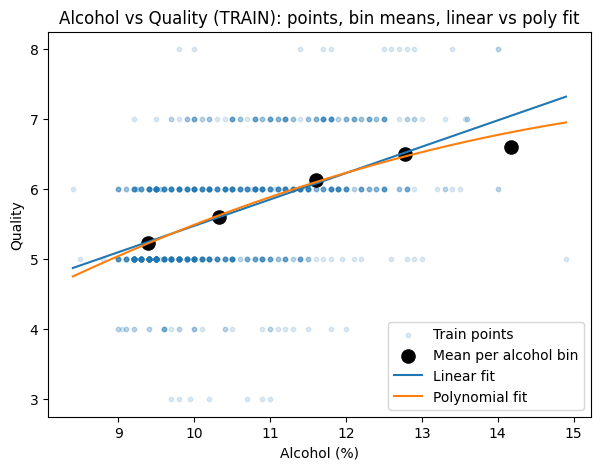

In [48]:
# =========================================================
# GOAL:
# Plot 4 things on the same chart (TRAIN only):
# 1) raw points (alcohol vs quality)
# 2) average quality inside 5 alcohol bins (black dots)
# 3) linear fit line (quality ~ alcohol)
# 4) polynomial fit curve (quality ~ alcohol + alcohol^2)
# =========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Train data for the plot (x = alcohol, y = quality)
x = train_df["alcohol"]                      # alcohol feature (TRAIN)
y = train_df["quality"]                      # quality target (TRAIN)

# Make 5 equal-width alcohol bins and compute mean alcohol + mean quality per bin
bins = np.linspace(x.min(), x.max(), 6)      # 6 edges -> 5 bins
bin_means = (train_df.assign(bin=pd.cut(x, bins=bins, include_lowest=True))   # add bin label per row
                    .groupby("bin", observed=True)[["alcohol", "quality"]]    # group by bins
                    .mean())                                                   # mean per bin

# Smooth x-grid so model lines look continuous
xs = np.linspace(x.min(), x.max(), 200)      # 200 points across alcohol range
xs_df = pd.DataFrame({"alcohol": xs})        # statsmodels expects a DataFrame with column name "alcohol"

# Model predictions on the smooth grid
y_lin  = model_alc_sm.predict(xs_df)         # linear model: quality ~ alcohol
y_poly = poly_sm.predict(xs_df)              # polynomial model: quality ~ alcohol + alcohol^2

# Plot: raw points + binned means + fitted lines
plt.figure(figsize=(7, 5))
plt.scatter(x, y, alpha=0.15, s=10, label="Train points")                 # raw TRAIN wines
plt.scatter(bin_means["alcohol"], bin_means["quality"], s=90,
            color="black", label="Mean per alcohol bin")                  # 5 bin-average points
plt.plot(xs, y_lin, label="Linear fit")                                   # straight line fit
plt.plot(xs, y_poly, label="Polynomial fit")                              # curved fit

plt.xlabel("Alcohol (%)")
plt.ylabel("Quality")
plt.title("Alcohol vs Quality (TRAIN): points, bin means, linear vs poly fit")
plt.legend()
plt.show()


### Conclusion: polynomial regression vs linear regression:

Introducing a quadratic term for alcohol was meant to capture nonlinearity. However, validation performance improves only marginally (R²: 0.220 → 0.227). 

5 dots represent true average quality for 5 alcohol ranges: quality increases when alcohol increases BUT not straight, it slightly bends.

Linear Rregression is straight line (constant slope) and overshoots at the far right (high alcohol).

Polynomial Regression follows the bin structure slightly better, but just slightly

Adding a quadratic term for alcohol (quality ~ alcohol + alcohol²) produces only a negligible improvement.

I(alcohol ** 2) has coef = -0.0250. The effect of quadratic curvature is almost none.

I(alcohol ** 2) has p = 0.136 which is >0.05 so quadratic curvature is not statistically significant.

Polynomial regression does not overcome the limitations of single-feature models.


# XIV 

# Compare all models:

In [49]:
print("\nBASELINE (median) vs VAL REGRESSION (LINEAR, POLY and MULTI)")
print("-"*60)
# Baseline (median)
print(f"Baseline (median)        | MAE: {val_mae_baseline:.3f}, RMSE: {val_rmse_baseline:.3f}, R^2: {val_r2_baseline:.3f}")

# Simple linear regression (scikit, alcohol only)
print(f"Sklearn alcohol          | MAE: {val_mae_alc_skl:.3f}, RMSE: {val_rmse_alc_skl:.3f}, R^2:  {val_r2_alc_skl:.3f}")

# Polynomial regression: quality ~ alcohol + alcohol^2
print(f"Poly alcohol + alcohol^2 | MAE: {poly_mae:.3f}, RMSE: {poly_rmse:.3f}, R^2:  {poly_r2:.3f}")

# Multiple linear regression: all 11 features (scikit metrics)
print(f"Multiple (11 features)   | MAE: {mlr_mae:.3f}, RMSE: {mlr_rmse:.3f}, R^2:  {mlr_r2:.3f}\n")



BASELINE (median) vs VAL REGRESSION (LINEAR, POLY and MULTI)
------------------------------------------------------------
Baseline (median)        | MAE: 0.652, RMSE: 0.888, R^2: -0.181
Sklearn alcohol          | MAE: 0.569, RMSE: 0.722, R^2:  0.220
Poly alcohol + alcohol^2 | MAE: 0.564, RMSE: 0.719, R^2:  0.227
Multiple (11 features)   | MAE: 0.502, RMSE: 0.653, R^2:  0.362



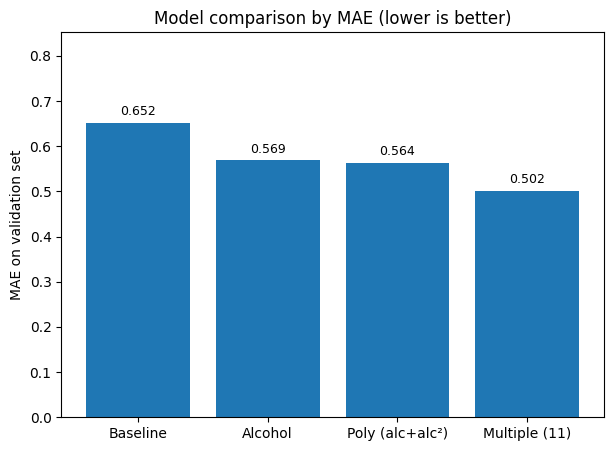

In [50]:
import matplotlib.pyplot as plt

model_names = [
    "Baseline",
    "Alcohol",
    "Poly (alc+alc²)",
    "Multiple (11)"
]

mae_values = [
    val_mae_baseline,   # baseline median MAE on VAL
    val_mae_alc_skl,    # scikit single alcohol MAE on VAL
    poly_mae,           # polynomial MAE on VAL
    mlr_mae             # MLR MAE on VAL (11 features)
]

plt.figure(figsize=(7,5))
bars = plt.bar(model_names, mae_values)

plt.ylabel("MAE on validation set")
plt.title("Model comparison by MAE (lower is better)")

# optional: annotate bars with values
for bar, v in zip(bars, mae_values):
    plt.text(bar.get_x() + bar.get_width()/2, v + 0.01, f"{v:.3f}",
             ha="center", va="bottom", fontsize=9)

plt.ylim(0, max(mae_values) + 0.2)
plt.show()


### Conclusion: models compariosn:

- Always predicting the median quality (Basseline), misses about 0.65 points on average. 
- One feature (alcohol) improves things a bit.
- Poly barely improves.
- multiple regression (11 features) lowers the average error noticeably but still limited because quality is noisy and subjective.

### Based on validation MAE and R², I select Multiple Linear Regression (11 features) as final model.”

# XV
# Residual diagnostics: TRAIN-fitted Multiple Linear Regression model

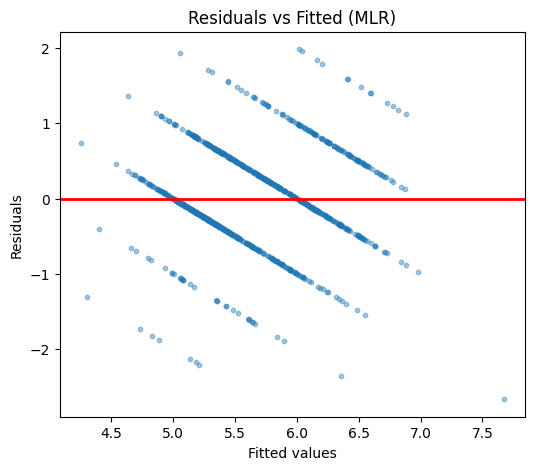

In [51]:
# Residual diagnostics (MLR fitted on TRAIN): check are variances of errors constant?
# Does model make errors of roughly the same size everywhere — for small and large predictions alike?

import matplotlib.pyplot as plt

fitted = mlr_sm.fittedvalues   # vector with all predictions 
resid = mlr_sm.resid           # vector with all errors (true - fitted)

plt.figure(figsize=(6,5))
plt.scatter(fitted, resid, alpha=0.4, s=10)
plt.axhline(0, color="red", linewidth=2)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (MLR)")
plt.show()

# print(fitted)
# print(resid)

Each blue diagonal stripe corresponds to all samples whose true integer label is the same.

- points are above red line, model predicted too low
- points are below red line, model predicted too high
- points close to the red line have smaller prediction errors

### Due to the categorical-like target the residuals patterns are not obvious from the plot so I'll try to examine homo/hetero scedasticity (spread-ness) below:

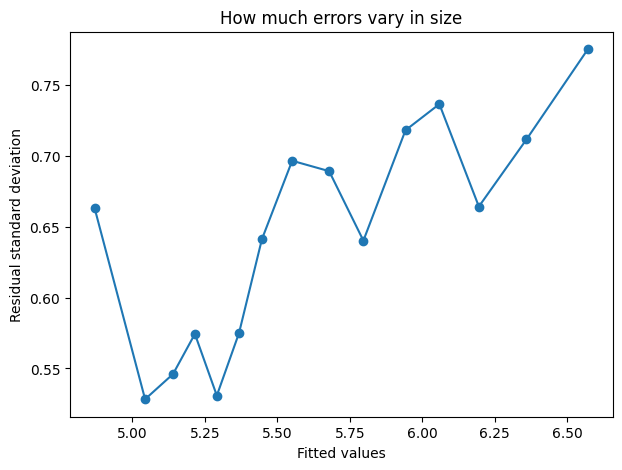

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dfp = pd.DataFrame({
    "fitted": mlr_sm.fittedvalues,
    "resid": mlr_sm.resid
}).sort_values("fitted")

dfp["bin"] = pd.qcut(dfp["fitted"], q=15, duplicates="drop")

g = dfp.groupby("bin")
x = g["fitted"].median()
std = g["resid"].std()

plt.figure(figsize=(7,5))
plt.plot(x, std, marker="o")
plt.xlabel("Fitted values")
plt.ylabel("Residual standard deviation")
plt.title("How much errors vary in size")
plt.show()


The multiple linear regression model was estimated using ordinary least squares (OLS), which assumes constant error variance - that errors are of roughly equal size everywhere.

But plot above shows that errors are larger and larger as predicted target values go higher. So, errros dont appear as random noise, There is an increasing trend.

### This is sign of heteroscedasticity (different-scattering, non-uniform-spread-of-errors)

Which means that while the model says “I’m sure”, in reality it’s less sure, especially for higher-quality wines. Confidence is less reliable for higher predicted wine-quality.

The model gets the general direction of feature effects right, but it is not certain about how strong those effects really are.

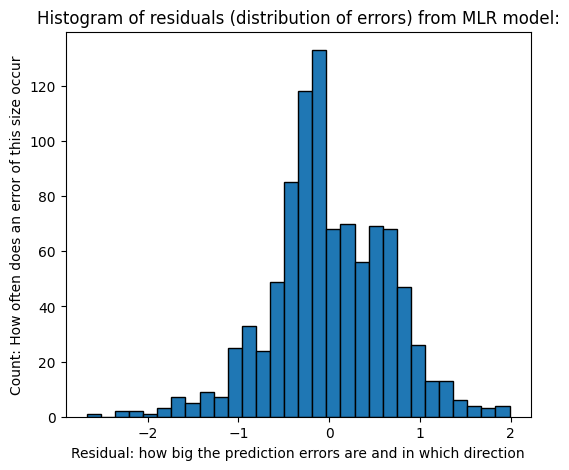

In [53]:
import scipy.stats as stats

# histogram
plt.figure(figsize=(6,5))
plt.hist(resid, bins=30, edgecolor="k")
plt.title("Histogram of residuals (distribution of errors) from MLR model:")
plt.xlabel("Residual: how big the prediction errors are and in which direction")
plt.ylabel("Count: How often does an error of this size occur")
plt.show()


Distribution of errors from Multiple Linear Regression model:

- tallest bars are around 0: **model is not biased globally**, predictions are not all too high and not all too low.
- most errors fall within 1 quality point of the true value (RMSE = 0.65)
- severe outliers exist - model is not poweful with low-quality and hi-quality wines

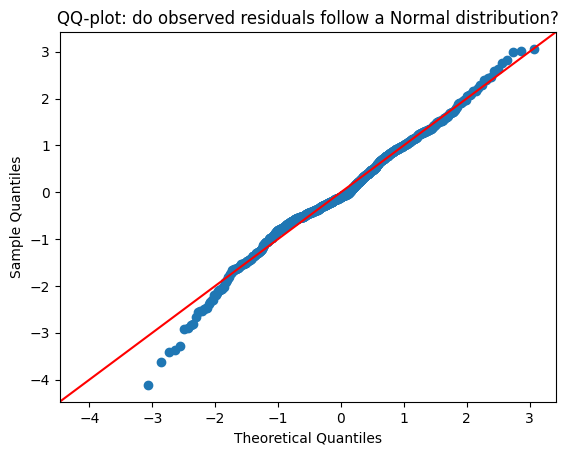

In [54]:
# QQ-plot compares errors point-by-point to a true Normal distribution

import scipy.stats as stats

fig = sm.qqplot(resid, line="45", fit=True)
plt.title("QQ-plot: do observed residuals follow a Normal distribution?")
plt.show()


QQ-plot investigates do errors follow normal distribution - are there unusually large errors at all?

QQ-plot here shows that normality breaks in the tails, not in the center

Most of errors are close to Normal distribution, , but some unusually large mistakes exist on both lower and upper tail. 

<Figure size 700x500 with 0 Axes>

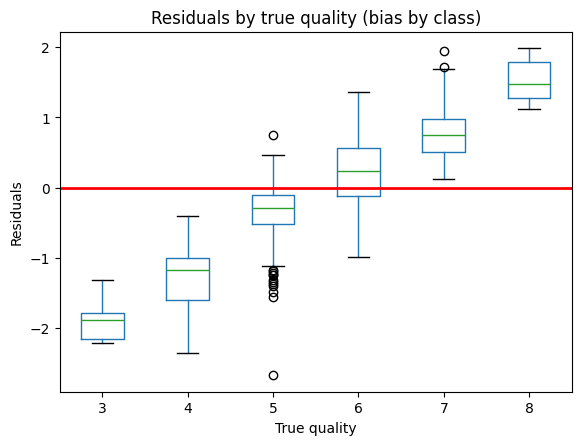

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

y_true = y_train  # <-- use the exact y you fit on (train)
fitted = mlr_sm.fittedvalues
resid  = mlr_sm.resid

dfq = pd.DataFrame({"quality": y_true, "resid": resid})

plt.figure(figsize=(7,5))
dfq.boxplot(column="resid", by="quality", grid=False)
plt.axhline(0, color="red", linewidth=2)
plt.title("Residuals by true quality (bias by class)")
plt.suptitle("")
plt.xlabel("True quality")
plt.ylabel("Residuals")
plt.show()


low qualities → overpredicted

high qualities → underpredicted

In [56]:
# Errors per quality value

val_errors = y_val - y_val_pred_mlr_sm

val_df_errors = val_df.copy()
val_df_errors["quality_true"] = y_val
val_df_errors["error"] = val_errors

print(val_df_errors.groupby("quality_true")["error"].agg(["mean","std","count"]))

                  mean       std  count
quality_true                           
3            -1.842151       NaN      1
4            -1.474359  0.421098      9
5            -0.344299  0.352418     81
6             0.254982  0.424089     84
7             0.698905  0.399892     27
8             1.617282  0.246640      2


Numeric summary of the same boxplots:

Prediction errors are small for 5–6 but large for 3–4 or 7–8

The model predicts average-quality wines (5–6) reasonably well, but makes larger errors for low- and high-quality wines.

In [57]:
mlr_sm_robust = mlr_sm.get_robustcov_results(cov_type="HC3")
print(mlr_sm_robust.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     46.19
Date:                Thu, 15 Jan 2026   Prob (F-statistic):           1.22e-80
Time:                        16:38:20   Log-Likelihood:                -938.87
No. Observations:                 951   AIC:                             1902.
Df Residuals:                     939   BIC:                             1960.
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.4098 

### Conclusion: OLS found the line, but HC3 (instead of default "nonfobust") fixes how confident the model sounds

- Standard errors increased
- p-values slightly changed
- Coefficients stayed the same
- R² stayed the same
- Direction of effects stayed the same

### Residual diagnostics conclusion:

Ordinary least squares fitting assumes that errors are centered around zero and have constant variance.

Residual diagnostics show that:
- most moderate prediction errors are indeed centered around zero, meaning the model is not systematically too optimistic or pessimistic, but errors do not behave like random noise of equal size across all predictions.
- instead, errors become larger for extreme wines, especially at high predicted quality.
- model explains the data, but its predictive accuracy is weak at the extremes.

### HC3 didn’t made the model better. The model’s predictions stay the same and TEST dataset will be evaluated using the original fitted model, but HC3 adjusted how confident the model claims to be about individual feature effects.

With standard errors increased and p-values slightly changed, the model is now more honest about what it knows and what it doesn’t know.

If i used scikit-learn I would not do this as scikit-learn is designed for predictions, and not for statistical interpretation. Scikit-learn does NOT give standard errors and p-values.

# XVI
# Final prediction on TEST data portion: Multiple Linear Regression model

In [58]:
# Final prediction on TEST data portion:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# TRAIN
y_train_pred_mlr = mlr_sm.predict(train_df)
train_mae = mean_absolute_error(y_train, y_train_pred_mlr)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_mlr))
train_r2 = r2_score(y_train, y_train_pred_mlr)

# VAL (already computed: mlr_mae, mlr_rmse, mlr_r2)
val_mae  = mlr_mae
val_rmse = mlr_rmse
val_r2   = mlr_r2

# predict on TEST
y_test_pred_mlr = mlr_sm.predict(test_df)
test_mae = mean_absolute_error(y_test, y_test_pred_mlr)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_mlr))
test_r2 = r2_score(y_test, y_test_pred_mlr)

print("MLR (TRAIN) | MAE: %.3f, RMSE: %.3f, R^2: %.3f" % (train_mae, train_rmse, train_r2))
print("MLR (VAL)   | MAE: %.3f, RMSE: %.3f, R^2: %.3f" % (val_mae,   val_rmse,   val_r2))
print("MLR (TEST)  | MAE: %.3f, RMSE: %.3f, R^2: %.3f" % (test_mae,  test_rmse,  test_r2))


MLR (TRAIN) | MAE: 0.503, RMSE: 0.649, R^2: 0.381
MLR (VAL)   | MAE: 0.502, RMSE: 0.653, R^2: 0.362
MLR (TEST)  | MAE: 0.542, RMSE: 0.707, R^2: 0.244


### Conclusion: 

On the **test set, the error increases and R² drops** compared to validation.
This confirms that the model does not generalize well and its predictive power is limited.
The results are consistent with the earlier conclusion that wine quality is noisy and hard to predict with a linear model.

### Final Modeling Conclusion (Wine Quality Regression)

Several linear regression models were evaluated on the red wine quality dataset.
Simple models using single predictors improved only slightly over a constant baseline.
Multiple Linear Regression using all features performed best on validation data, but test performance degraded noticeably (MAE ≈ 0.54, R² ≈ 0.24).
Residual checks for best model show mild heteroscedasticity, with error sizes increasing for higher predictions, but no issues that invalidate the model itself.

# Final Exam conclusion:
Overall, exploratory data analysis and statistical investigations confirm that wine quality is indeed influenced by chemical properties, but not in a precise or stable way. 
The linear regression model reflects these findings as it performs well for average wines but makes larger errors for very low and very high quality wines. This model is useful for understanding general trends rather than for making accurate predictions.

### Next steps:
Explore tree-based models to better capture features interactions and extreme quality values.